<a href="https://colab.research.google.com/github/AmineHamzaoui/Financial-Market-Forcesating/blob/master/Market_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
offset = 0
limit = 3000
period = 'max'

In [ ]:
! pip install yfinance > /dev/null 2>&1
! mkdir /content/drive/MyDrive/hist

In [ ]:
import yfinance as yf
import os, contextlib

In [ ]:
# NEM (to be verified if it's in S&P 500)
symbols = [
    'NEM', 'APD', 'AMZN', 'HLT', 'WMT', 'PG', 'MPC', 'CVX',
    'GS', 'JPM', 'A', 'PFE', 'AAL', 'BA', 'AAPL', 'AMD',
    'GOOGL', 'FB', 'AMT', 'UDR', 'CMS', 'AWK', 'IXIC', 'GSPC', 'DJI'
]


In [ ]:
!pip install curl_cffi --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 49.9 MB/s eta 0:00:00


In [ ]:
import os
import yfinance as yf
import contextlib
import time
from curl_cffi import requests  # use curl_cffi instead of standard requests
# NEM (to be verified if it's in S&P 500)
symbols = [
    'NEM', 'APD', 'AMZN', 'HLT', 'WMT', 'PG', 'MPC', 'CVX',
    'GS', 'JPM', 'A', 'PFE', 'AAL', 'BA', 'AAPL', 'AMD',
    'GOOGL', 'META', 'AMT', 'UDR', 'CMS', 'AWK'
]

# Define session with browser impersonation
session = requests.Session(impersonate="chrome")

offset = 0
limit = 3000
start_date = '2015-01-01'
end_date = '2025-05-09'

# Assume your `symbols` list is already defined
limit = limit if limit else len(symbols)
end = min(offset + limit, len(symbols))
is_valid = [False] * len(symbols)

os.makedirs('hist', exist_ok=True)

with open(os.devnull, 'w') as devnull:
    with contextlib.redirect_stdout(devnull):
        for i in range(offset, end):
            s = symbols[i]
            for attempt in range(3):
                try:
                    # Use impersonated session
                    ticker = yf.Ticker(s, session=session)
                    data = ticker.history(start=start_date, end=end_date)
                    if data.empty:
                        print(f"No data for {s}")
                        break
                    data.to_csv(f'/content/drive/MyDrive/hist/{s}.csv')
                    is_valid[i] = True
                    print(f"Downloaded: {s}")
                    break
                except Exception as e:
                    print(f"Attempt {attempt + 1} failed for {s}: {e}")
                    time.sleep(5)
            time.sleep(1)

print('Total number of valid symbols downloaded = {}'.format(sum(is_valid)))


ERROR:yfinance:$IXIC: possibly delisted; no timezone found
ERROR:yfinance:$GSPC: possibly delisted; no timezone found


Total number of valid symbols downloaded = 23


In [ ]:
pip install gdelt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 787.4/787.4 kB 14.9 MB/s eta 0:00:00


In [ ]:
pip install gdeltdoc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 89.4 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.


In [ ]:
from gdeltdoc import GdeltDoc, Filters
import pandas as pd

# Define your list of stock symbols and associated companies if available
symbols = [
    'NEM', 'APD', 'AMZN', 'HLT', 'WMT', 'PG', 'MPC', 'CVX',
    'GS', 'JPM', 'A', 'PFE', 'AAL', 'BA', 'AAPL', 'AMD',
    'GOOGL', 'META', 'AMT', 'UDR', 'CMS', 'AWK', 'IXIC', 'GSPC', 'DJI'
]

# Keywords for general stock, finance, trading, and economic triggers
generic_keywords = [
    "stock market", "stocks", "equities", "shares", "equity market",
    "stock trading", "stock exchange", "market rally", "market crash",
    "S&P 500", "NASDAQ", "Dow Jones", "FTSE 100", "Nikkei", "DAX",
    "buy stocks", "sell stocks", "stock investment", "portfolio",
    "retail investor", "hedge fund", "day trading", "market volatility",
    "short selling", "interest rates", "inflation", "recession",
    "monetary policy", "federal reserve", "ECB decision", "earnings report"
]

# Add ticker symbol and variations (e.g., "AAPL stock", "AAPL earnings")
symbol_keywords = []
for symbol in symbols:
    symbol_keywords.extend([
        f"{symbol} stock",
        f"{symbol} shares",
        f"{symbol} earnings",
        f"{symbol} price"
    ])

# Combine all keywords into one list
all_keywords = generic_keywords + symbol_keywords

# Initialize GDELT client
gd = GdeltDoc()

# Store results in a DataFrame
all_articles = pd.DataFrame()

# Iterate through keywords and collect articles
for kw in all_keywords:
    try:
        f = Filters(
            keyword=kw,
            start_date="2015-02-19",
            end_date="2025-05-",
            source_country="US"
        )
        results = gd.article_search(f)
        if not results.empty:
            results["search_keyword"] = kw
            all_articles = pd.concat([all_articles, results])
    except Exception as e:
        print(f"Error fetching for keyword: {kw} -> {e}")

# Reset index and show results
all_articles.reset_index(drop=True, inplace=True)
print(all_articles[["seendate", "url", "title", "domain", "search_keyword"]].head())

Error fetching for keyword: stock market -> The query was not valid. The API error message was: Invalid query start date.
Error fetching for keyword: stocks -> The query was not valid. The API error message was: Invalid query start date.
Error fetching for keyword: equities -> The query was not valid. The API error message was: Invalid query start date.
Error fetching for keyword: shares -> The query was not valid. The API error message was: Invalid query start date.
Error fetching for keyword: equity market -> The query was not valid. The API error message was: Invalid query start date.
Error fetching for keyword: stock trading -> The query was not valid. The API error message was: Invalid query start date.
Error fetching for keyword: stock exchange -> The query was not valid. The API error message was: Invalid query start date.
Error fetching for keyword: market rally -> The query was not valid. The API error message was: Invalid query start date.
Error fetching for keyword: market c

KeyError: "None of [Index(['seendate', 'url', 'title', 'domain', 'search_keyword'], dtype='object')] are in the [columns]"

In [ ]:
import pandas as pd
from gdeltdoc import GdeltDoc, Filters
from datetime import datetime, timedelta

gd = GdeltDoc()
all_articles = pd.DataFrame()

# Define date range chunks
start = datetime(2015, 2, 20)
end = datetime(2025, 5, 9)
step = timedelta(days=30)

symbols = [
    'NEM', 'APD', 'AMZN', 'HLT', 'WMT', 'PG', 'MPC', 'CVX',
    'GS', 'JPM', 'A', 'PFE', 'AAL', 'BA', 'AAPL', 'AMD',
    'GOOGL', 'META', 'AMT', 'UDR', 'CMS', 'AWK', 'IXIC', 'GSPC', 'DJI'
]

# Keywords for general stock, finance, trading, and economic triggers
generic_keywords = [
    "stock market", "stocks", "equities", "shares", "equity market",
    "stock trading", "stock exchange", "market rally", "market crash",
    "S&P 500", "NASDAQ", "Dow Jones", "FTSE 100", "Nikkei", "DAX",
    "buy stocks", "sell stocks", "stock investment", "portfolio",
    "retail investor", "hedge fund", "day trading", "market volatility",
    "short selling", "interest rates", "inflation", "recession",
    "monetary policy", "federal reserve", "ECB decision", "earnings report"
]

# Add ticker symbol and variations (e.g., "AAPL stock", "AAPL earnings")
symbol_keywords = []
for symbol in symbols:
    symbol_keywords.extend([
        f"{symbol} stock",
        f"{symbol} shares",
        f"{symbol} earnings",
        f"{symbol} price"
    ])
# Loop through keywords and date chunks
for kw in keywords:
    current = start
    while current < end:
        chunk_start = current.strftime('%Y-%m-%d')
        chunk_end = (current + step).strftime('%Y-%m-%d')
        current += step

        try:
            f = Filters(keyword=kw, start_date=chunk_start, end_date=chunk_end)
            results = gd.article_search(f)
            if not results.empty:
                results["search_keyword"] = kw
                results["date_range"] = f"{chunk_start} to {chunk_end}"
                all_articles = pd.concat([all_articles, results], ignore_index=True)
        except Exception as e:
            print(f"{kw}: {chunk_start} to {chunk_end} -> {e}")

# Output
if not all_articles.empty:
    print(all_articles[["seendate", "url", "title", "domain", "search_keyword", "date_range"]].head())
else:
    print("No articles fetched.")


AAPL stock: 2015-02-20 to 2015-03-22 -> The query was not valid. The API error message was: Invalid query start date.
AAPL stock: 2015-03-22 to 2015-04-21 -> The query was not valid. The API error message was: Invalid query start date.
AAPL stock: 2015-04-21 to 2015-05-21 -> The query was not valid. The API error message was: Invalid query start date.
AAPL stock: 2015-05-21 to 2015-06-20 -> The query was not valid. The API error message was: Invalid query start date.
AAPL stock: 2015-06-20 to 2015-07-20 -> The query was not valid. The API error message was: Invalid query start date.
AAPL stock: 2015-07-20 to 2015-08-19 -> The query was not valid. The API error message was: Invalid query start date.
AAPL stock: 2015-08-19 to 2015-09-18 -> The query was not valid. The API error message was: Invalid query start date.
AAPL stock: 2015-09-18 to 2015-10-18 -> The query was not valid. The API error message was: Invalid query start date.
AAPL stock: 2015-10-18 to 2015-11-17 -> The query was no

In [ ]:
all_articles

url  \
0      http://www.nasdaq.com/article/is-apple-inc-aap...   
1      http://investorplace.com/2017/02/is-apple-inc-...   
2      http://www.valuewalk.com/2017/01/apple-inc-aap...   
3      http://investorplace.com/2017/01/buy-apple-inc...   
4      http://www.nasdaq.com/article/should-i-buy-app...   
...                                                  ...   
34321  https://www.finanznachrichten.de/nachrichten-2...   
34322  https://www.finanznachrichten.de/nachrichten-2...   
34323  https://www.finanznachrichten.de/nachrichten-2...   
34324  https://www.finanznachrichten.de/nachrichten-2...   
34325  https://www.finanznachrichten.de/nachrichten-2...   

                                              url_mobile  \
0      http://www.nasdaq.com/article/is-apple-inc-aap...   
1      http://investorplace.com/2017/02/is-apple-inc-...   
2      http://www.valuewalk.com/2017/01/apple-inc-aap...   
3      http://investorplace.com/2017/01/buy-apple-inc...   
4      http://www.nasdaq.com/article/should-i-buy-app...   
...                                                  ...   
34321                                                      
34322                                                      
34323                                                      
34324                                                      
34325                                                      

                                                   title          seendate  \
0      Is Apple Inc . ( AAPL ) Stock Due for a Correc...  20170208T213000Z   
1      Is Apple Inc . ( AAPL ) Stock Due for a Correc...  20170208T171500Z   
2      Apple Inc . ( AAPL ) Stock Downgraded Ahead Of...  20170124T191500Z   
3      Should I Buy Apple Inc . ( AAPL ) Stock ? 3 Pr...  20170111T124500Z   
4      Should I Buy Apple Inc . ( AAPL ) Stock ? 3 Pr...  20170111T143000Z   
...                                                  ...               ...   
34321  Amundi MSCI Emerging Ex China ESG Leaders Sele...  20250428T083000Z   
34322  Amundi Global Corp SRI 1 - 5Y UCITS ETF DR - H...  20250428T083000Z   
34323  Amundi Global Aggregate Proceeds Bond 1 - 10Y ...  20250428T081500Z   
34324  Amundi Global Aggregate Proceeds Bond 1 - 10Y ...  20250428T081500Z   
34325  Amundi Global Aggregate Proceeds Bond 1 - 10Y ...  20250429T081500Z   

                                             socialimage  \
0               http://www.nasdaq.com/images/dreamit.jpg   
1      http://investorplace.com/wp-content/uploads/20...   
2      http://www.valuewalk.com/wp-content/uploads/20...   
3      http://investorplace.com/wp-content/uploads/20...   
4               http://www.nasdaq.com/images/dreamit.jpg   
...                                                  ...   
34321  https://www.finanznachrichten.de/content/g/fb.png   
34322  https://www.finanznachrichten.de/content/g/fb.png   
34323  https://www.finanznachrichten.de/content/g/fb.png   
34324  https://www.finanznachrichten.de/content/g/fb.png   
34325  https://www.finanznachrichten.de/content/g/fb.png   

                     domain language  sourcecountry search_keyword  \
0                nasdaq.com  English  United States     AAPL stock   
1         investorplace.com  English  United States     AAPL stock   
2             valuewalk.com  English  United States     AAPL stock   
3         investorplace.com  English  United States     AAPL stock   
4                nasdaq.com  English  United States     AAPL stock   
...                     ...      ...            ...            ...   
34321  finanznachrichten.de  English        Germany      Dow Jones   
34322  finanznachrichten.de  English        Germany      Dow Jones   
34323  finanznachrichten.de  English        Germany      Dow Jones   
34324  finanznachrichten.de  English        Germany      Dow Jones   
34325  finanznachrichten.de  English        Germany      Dow Jones   

                     date_range  
0      2017-01-10 to 2017-02-09  
1      2017-01-10 to 2017-02-09  
2      201

In [ ]:
pip install google-cloud-bigquery pandas

In [ ]:
!gcloud auth application-default login


Go to the following link in your browser, and complete the sign-in prompts:

    https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=764086051850-6qr4p6gpi6hn506pt8ejuq83di341hur.apps.googleusercontent.com&redirect_uri=https%3A%2F%2Fsdk.cloud.google.com%2Fapplicationdefaultauthcode.html&scope=openid+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcloud-platform+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fsqlservice.login&state=nbYHI1D4diQHftL0vBSwrVN0owawt3&prompt=consent&token_usage=remote&access_type=offline&code_challenge=RkAXgYgdIdh9eaC-4fHmhrMOipEgm9TBH9zleDqpmPg&code_challenge_method=S256

Once finished, enter the verification code provided in your browser: 4/0AUJR-x6UOUh34kWb2CIT2uLljJyR6DpP9SNSal3IcTjbJkBAXqGgDm56SCP1UIUXx0h9Hg

Credentials saved to file: [/content/.config/application_default_credentials.json]

These credentials will be used by any library that requests Application Default Credentials (ADC).
Ca

In [ ]:
from google.cloud import bigquery

# Replace with your actual project ID
project_id = project_id

# Create BigQuery client
client = bigquery.Client(project=project_id)

/usr/local/lib/python3.11/dist-packages/google/auth/_default.py:76: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. See the following page for troubleshooting: https://cloud.google.com/docs/authentication/adc-troubleshooting/user-creds. 
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)


In [ ]:
  GlobalEventID,
  MonthYear,
  IsRootEvent,
  QuadClass,
  NumMentions,
  NumSources,
  NumArticles,
  SQLDATE,
  Actor1Name,
  Actor2Name,
  EventCode,
  GoldsteinScale,
  AvgTone,
  Actor1Geo_Type

In [ ]:
from google.cloud import bigquery
import pandas as pd



# Your SQL query
query = """
SELECT
  SQLDATE,
  Actor1Name,
  Actor2Name,
  EventCode,
  GoldsteinScale,
  AvgTone
FROM
  `gdelt-bq.gdeltv2.events`
WHERE
SQLDATE BETWEEN 20150301 AND 20250101
LIMIT 1000
"""

# Run and convert to DataFrame
df = client.query(query).to_dataframe()
print(df.head())

Forbidden: 403 Quota exceeded: Your project exceeded quota for free query bytes scanned. For more information, see https://cloud.google.com/bigquery/docs/troubleshoot-quotas; reason: quotaExceeded, location: unbilled.analysis, message: Quota exceeded: Your project exceeded quota for free query bytes scanned. For more information, see https://cloud.google.com/bigquery/docs/troubleshoot-quotas

Location: US
Job ID: bdb0e3ab-e42b-41a0-93ea-c08fd8f77eaa


In [ ]:
df

SQLDATE Actor1Name  Actor2Name EventCode  GoldsteinScale   AvgTone
0      20250510   MILITARY     UKRAINE       162            -5.6 -3.138462
1      20250510  COMPANIES     KINGDOM       073             7.4  0.000000
2      20250510       None    TEL AVIV       125            -5.0 -3.144654
3      20250510  PRESIDENT       EGYPT      0234             3.4 -0.584795
4      20250510  INDONESIA    THE POPE       082             5.0  1.846154
...         ...        ...         ...       ...             ...       ...
99995  20250427     MINIST   TERRORIST       193           -10.0 -9.832134
99996  20250427    CATALAN        POLE       193           -10.0  0.353982
99997  20250427       None      POLICE       193           -10.0 -1.915185
99998  20250427       CORK  GOVERNMENT       193           -10.0 -1.960784
99999  20250427       None      SERBIA       193           -10.0 -3.715499

[100000 rows x 6 columns]

In [ ]:
df.to_csv('/content/news.csv')

In [ ]:
pip install fredapi

In [ ]:
fddd1fd593cf45c9f99350b7bcb88d9f

In [ ]:

fred = Fred(api_key=API_fred)

In [ ]:
from fredapi import Fred

fred = Fred(api_key=API_fred)

# Get US GDP data
gdp_data = fred.get_series('GDP')

print(gdp_data.head())


1946-01-01        NaN
1946-04-01        NaN
1946-07-01        NaN
1946-10-01        NaN
1947-01-01    243.164
dtype: float64


In [ ]:
gdp_data

1946-01-01          NaN
1946-04-01          NaN
1946-07-01          NaN
1946-10-01          NaN
1947-01-01      243.164
                ...    
2024-01-01    28624.069
2024-04-01    29016.714
2024-07-01    29374.914
2024-10-01    29723.864
2025-01-01    29977.632
Length: 317, dtype: float64

In [ ]:
from fredapi import Fred
import pandas as pd


# Define date range
start_date = '2015-01-01'
end_date = '2025-05-01'

# Define FRED series codes and labels
series_dict = {
    'FEDFUNDS': 'Interest Rate (Federal Funds)',
    'UNRATE': 'Unemployment Rate',
    'CPIAUCSL': 'Consumer Price Index (CPI)',
    'A191RL1Q225SBEA': 'GDP Growth (Real GDP % Change)',
    'PCEPI': 'Inflation (PCE Index)'
}

# Fetch data within the time frame
data = pd.DataFrame()

for code, label in series_dict.items():
    print(f"Fetching: {label}")
    data[label] = fred.get_series(code, observation_start=start_date, observation_end=end_date)

# Preview and save
print(data.head())
data.to_csv("fred_data_2015_2025.csv")

Fetching: Interest Rate (Federal Funds)
Fetching: Unemployment Rate
Fetching: Consumer Price Index (CPI)
Fetching: GDP Growth (Real GDP % Change)
Fetching: Inflation (PCE Index)
            Interest Rate (Federal Funds)  Unemployment Rate  \
2015-01-01                           0.11                5.7   
2015-02-01                           0.11                5.5   
2015-03-01                           0.11                5.4   
2015-04-01                           0.12                5.4   
2015-05-01                           0.12                5.6   

            Consumer Price Index (CPI)  GDP Growth (Real GDP % Change)  \
2015-01-01                     234.747                             3.6   
2015-02-01                     235.342                             NaN   
2015-03-01                     235.976                             NaN   
2015-04-01                     236.222                             2.5   
2015-05-01                     237.001                             

In [ ]:
data = data.reset_index().rename(columns={"index": "Date"})

In [ ]:
data

Date  Interest Rate (Federal Funds)  Unemployment Rate  \
0   2015-01-01                           0.11                5.7   
1   2015-02-01                           0.11                5.5   
2   2015-03-01                           0.11                5.4   
3   2015-04-01                           0.12                5.4   
4   2015-05-01                           0.12                5.6   
..         ...                            ...                ...   
119 2024-12-01                           4.48                4.1   
120 2025-01-01                           4.33                4.0   
121 2025-02-01                           4.33                4.1   
122 2025-03-01                           4.33                4.2   
123 2025-04-01                           4.33                4.2   

     Consumer Price Index (CPI)  GDP Growth (Real GDP % Change)  \
0                       234.747                             3.6   
1                       235.342                             NaN   
2                       235.976                             NaN   
3                       236.222                             2.5   
4                       237.001                             NaN   
..                          ...                             ...   
119                     317.603                             NaN   
120                     319.086                            -0.3   
121                     319.775                             NaN   
122                     319.615                             NaN   
123                         NaN                             NaN   

     Inflation (PCE Index)  
0                   96.654  
1                   96.825  
2                   97.008  
3                   97.094  
4                   97.327  
..                     ...  
119                124.769  
120                125.231  
121                125.788  
122                125.732  
123                    NaN  

[124 rows x 6 columns]

In [ ]:
import pandas as pd
import os

# Set your folder path
folder_path = '/path/to/your/folder'  # 🔁 Change this

# Get list of CSV files
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# List to hold each stock DataFrame
all_data = []

for file in csv_files:
    stock_name = file.replace('.csv', '')  # Extract stock name
    file_path = os.path.join(folder_path, file)

    df = pd.read_csv(file_path, parse_dates=['Date'])
    df['Stock'] = stock_name  # Add stock label
    all_data.append(df)

# Concatenate into one long-format DataFrame
long_df = pd.concat(all_data, ignore_index=True)

# Optional: sort
long_df = long_df.sort_values(by=['Date', 'Stock']).reset_index(drop=True)

# Save or use
long_df.to_csv('stocks_long_format.csv', index=False)

In [ ]:
import pandas as pd
import os

# Set your folder path
folder_path = '/content/drive/MyDrive/hist/'  # 🔁 Change this

# Get list of CSV files
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# List to hold each stock DataFrame
all_data = []

for file in csv_files:
    stock_name = file.replace('.csv', '')  # Extract stock name
    file_path = os.path.join(folder_path, file)

    df = pd.read_csv(file_path, parse_dates=['Date'])
    df['Stock'] = stock_name  # Add stock label
    all_data.append(df)

# Concatenate into one long-format DataFrame
long_df = pd.concat(all_data, ignore_index=True)

# Optional: sort
long_df = long_df.sort_values(by=['Date', 'Stock']).reset_index(drop=True)

# Save or use
long_df.to_csv('stocks_long_format.csv', index=False)

In [ ]:
# Make sure you have pandas imported
import pandas as pd

# Feature engineering function applied per stock
def add_features(df):
    df = df.sort_values('Date')  # Sort by time

    # Daily Return
    df['Daily_Return'] = (df['Close'] - df['Open']) / df['Open']

    # Price Range
    df['Price_Range'] = (df['High'] - df['Low']) / df['Open']

    # Rolling Volatility of Close (7-day window)
    df['Volatility'] = df['Close'].rolling(window=7, min_periods=1).std()

    # Lag Features
    df['Close_Lag1'] = df['Close'].shift(1)
    df['Open_Lag1'] = df['Open'].shift(1)

    # Volume Change (day over day)
    df['Volume_Change'] = df['Volume'].pct_change()

    return df

# Apply to each stock group
long_df = long_df.groupby('Stock', group_keys=False).apply(add_features)


<ipython-input-104-1f2ebf157c88>:27: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  long_df = long_df.groupby('Stock', group_keys=False).apply(add_features)


In [ ]:
long_df=long_df.sort_values(by=['Stock', 'Date'])

In [ ]:
long_df.to_csv('long_df.csv')

In [ ]:
# Convert string with timezone to proper datetime, strip timezone, extract date
long_df['DateOnly'] = pd.to_datetime(long_df['Date'], utc=True).dt.tz_convert(None).dt.date

# Ensure the same for macro data
data['DateOnly'] = pd.to_datetime(data['Date']).dt.date

# Merge on the new DateOnly column
merged_df = pd.merge(long_df, data, on='DateOnly', how='left')

In [ ]:
merged_df.to_csv('merged_df.csv')

In [ ]:
print(long_df['Date'].dtype)
print(long_df['Date'].iloc[0])

object
2015-01-02 00:00:00-05:00


In [ ]:
def monthly_repeat_merge(stocks_df, macro_df, stock_date_col='Date', macro_date_col='Date'):
    """
    Repeat macro values across all stock dates in the same month.
    """
    # Copy and normalize
    stocks_df = stocks_df.copy()
    macro_df = macro_df.copy()

    # Parse and floor dates to month start
    stocks_df['Month'] = pd.to_datetime(stocks_df[stock_date_col], utc=True).dt.tz_convert(None).dt.to_period('M').dt.to_timestamp()
    macro_df['Month'] = pd.to_datetime(macro_df[macro_date_col]).dt.to_period('M').dt.to_timestamp()

    # Merge on 'Month' to broadcast monthly macro data
    merged_df = pd.merge(stocks_df, macro_df, on='Month', how='left')

    return merged_df

In [ ]:
merged_df = monthly_repeat_merge(long_df, data)

In [ ]:
merged_df.to_csv('merged_df.csv')

In [ ]:
# Sort by Date + your stock column to preserve time order
merged_df = merged_df.sort_values(by=['Date_x', 'Stock'])  # Replace 'StockSymbol' with your actual stock ID column

# Step 2: Forward-fill GDP Growth across all rows
merged_df['GDP Growth (Real GDP % Change)'] = merged_df['GDP Growth (Real GDP % Change)'].ffill()

In [ ]:
merged_df.to_csv('merged_df.csv')

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Macro_with_stocks.csv')

In [ ]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd

# Function to apply ADF test and return p-value
def adf_test(series):
    result = adfuller(series.dropna())
    return {
        'adf_statistic': result[0],
        'p_value': result[1],
        'used_lag': result[2],
        'n_obs': result[3],
        'critical_values': result[4],
        'stationary': result[1] < 0.05  # True if p < 0.05
    }

In [ ]:
# Replace 'price' with 'close' in groupby
adf_results = df.groupby('Stock')['Close'].apply(adf_test).apply(pd.Series)

In [ ]:
adf_results.to_csv('adf_results.csv')

In [ ]:
adf_results

0        1%        5%       10%
Stock                                                        
A     adf_statistic   -1.424377       NaN       NaN       NaN
      p_value          0.570535       NaN       NaN       NaN
      used_lag              6.0       NaN       NaN       NaN
      n_obs              2596.0       NaN       NaN       NaN
      critical_values       NaN -3.432871 -2.862654 -2.567363
...                         ...       ...       ...       ...
WMT   p_value               1.0       NaN       NaN       NaN
      used_lag             28.0       NaN       NaN       NaN
      n_obs              2574.0       NaN       NaN       NaN
      critical_values       NaN -3.432893 -2.862664 -2.567368
      stationary          False       NaN       NaN       NaN

[138 rows x 4 columns]

In [ ]:
def interpret_adf(p):
    if p < 0.05:
        return "Stationary (strong evidence)"
    elif p < 0.5:
        return "Possibly stationary (weak evidence)"
    else:
        return "Non-stationary"

# Apply interpretation to each stock
adf_results['adf_interpretation'] = adf_results['p_value'].apply(interpret_adf)

# Optional: Print interpretation summary per stock
for idx, row in adf_results.iterrows():
    print(f"Stock {row['stock']}: {row['adf_interpretation']} (p = {row['p_value']:.4f})")

KeyError: 'p_value'

In [ ]:
adf_results

0        1%        5%       10%
Stock                                                        
A     adf_statistic   -1.424377       NaN       NaN       NaN
      p_value          0.570535       NaN       NaN       NaN
      used_lag              6.0       NaN       NaN       NaN
      n_obs              2596.0       NaN       NaN       NaN
      critical_values       NaN -3.432871 -2.862654 -2.567363
...                         ...       ...       ...       ...
WMT   p_value               1.0       NaN       NaN       NaN
      used_lag             28.0       NaN       NaN       NaN
      n_obs              2574.0       NaN       NaN       NaN
      critical_values       NaN -3.432893 -2.862664 -2.567368
      stationary          False       NaN       NaN       NaN

[138 rows x 4 columns]

In [ ]:
# Filter where the second column (i.e., 'metric') equals 'p_value'
# Then extract the stock and the associated value
p_values = adf_results[adf_results.iloc[:, 1] == 'p_value'][['Stock', '0']]

# Rename columns for clarity
p_values.columns = ['stock', 'p_value']

# Convert p_value to numeric type
p_values['p_value'] = pd.to_numeric(p_values['p_value'], errors='coerce')

# Now apply interpretation
def interpret_adf(p):
    if p < 0.05:
        return "Stationary (strong evidence)"
    elif p < 0.5:
        return "Possibly stationary (weak evidence)"
    else:
        return "Non-stationary"

p_values['interpretation'] = p_values['p_value'].apply(interpret_adf)

# View the result
print(p_values.head())

KeyError: "None of [Index(['Stock', '0'], dtype='object')] are in the [columns]"

If p_value < 0.05, the series is stationary → set d = 0.

If p_value ≥ 0.05, the series is non-stationary → consider differencing once → d = 1.



A -> non stationary

AAL is stationary

AAPL is non stationary

AMD is stationary

AMT is non stationary

AMZN is non stationary

APD is non stationary

AWK is non stationary

BA is stationary

CMS	0.8157	Non-stationary

CVX	0.6388	Non-stationary

DJI	0.8862	Non-stationary

GOOGL	0.8692	Non-stationary

GS	0.9819	Non-stationary

HLT	0.9772	Non-stationary

JPM	0.9894	Non-stationary

META	0.9752	Non-stationary

MPC	0.8944	Non-stationary

NEM	0.3832	Possibly stationary

PFE	0.4455	Possibly stationary

PG	0.8792	Non-stationary

UDR	0.3243	Possibly stationary

WMT	1.0	Non-stationary


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
df['Date_x'] = pd.to_datetime(df['Date_x'], errors='coerce')

In [ ]:
df['Date_x'] = df['Date_x'].apply(lambda x: x.tz_localize(None) if x is not pd.NaT and x.tzinfo else x)


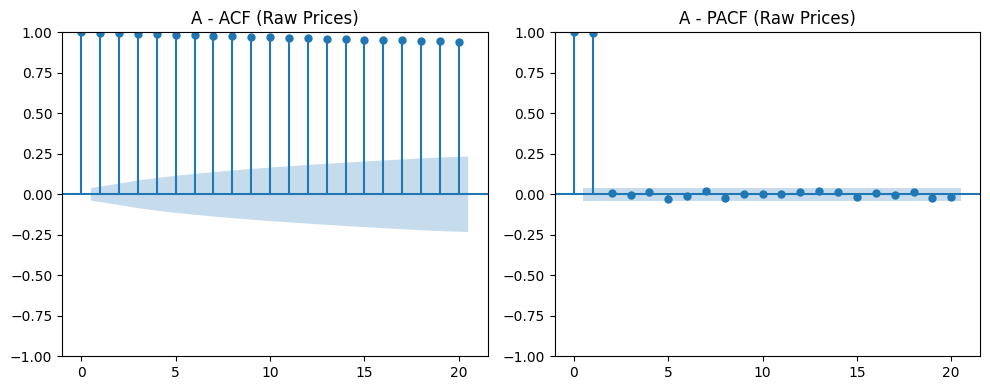

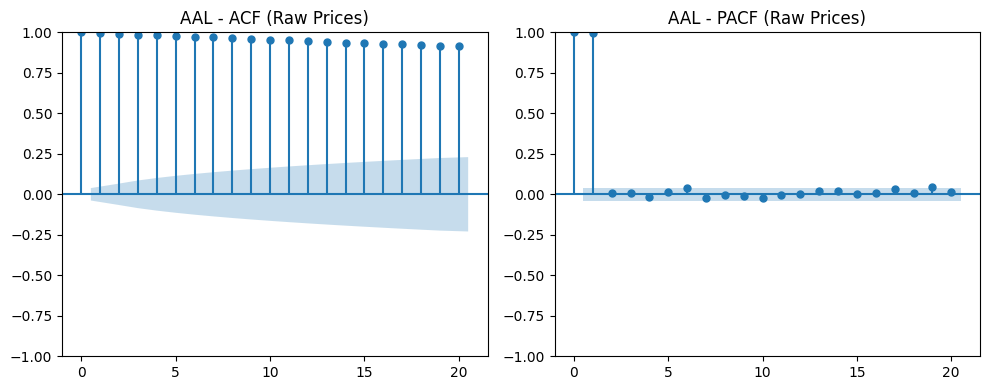

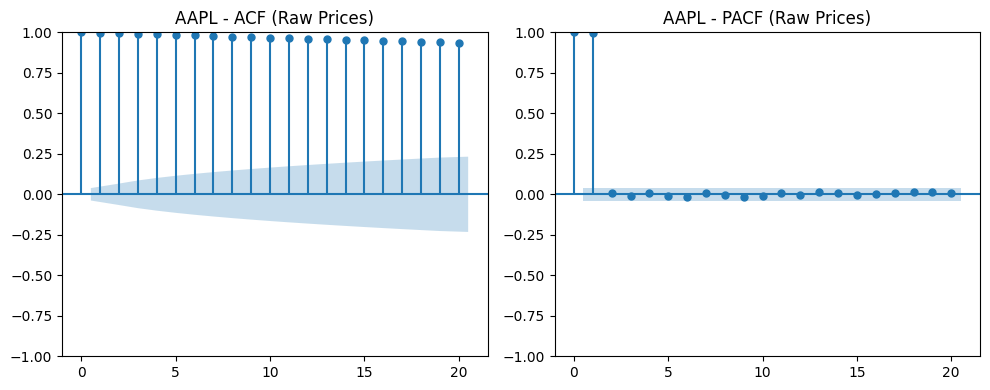

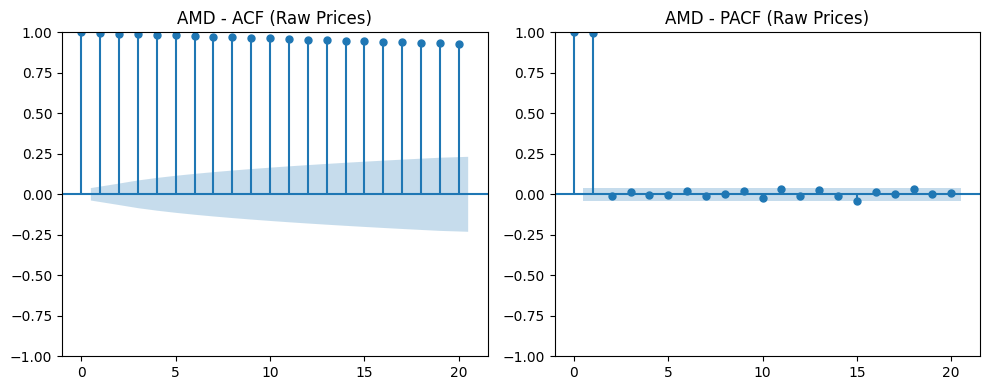

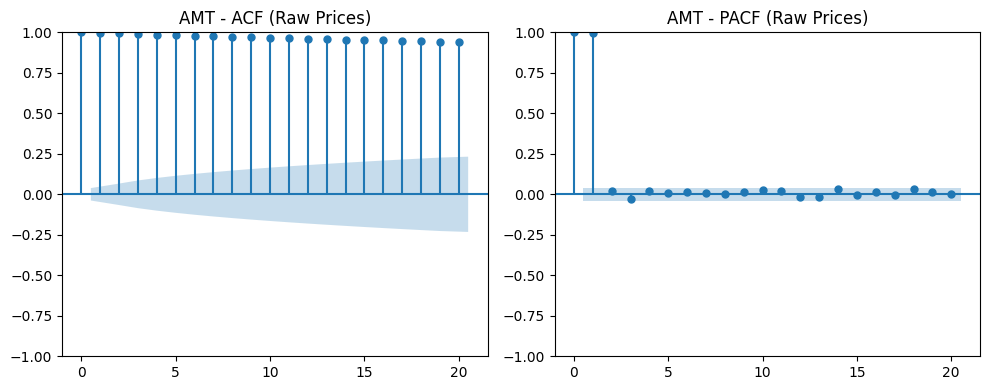

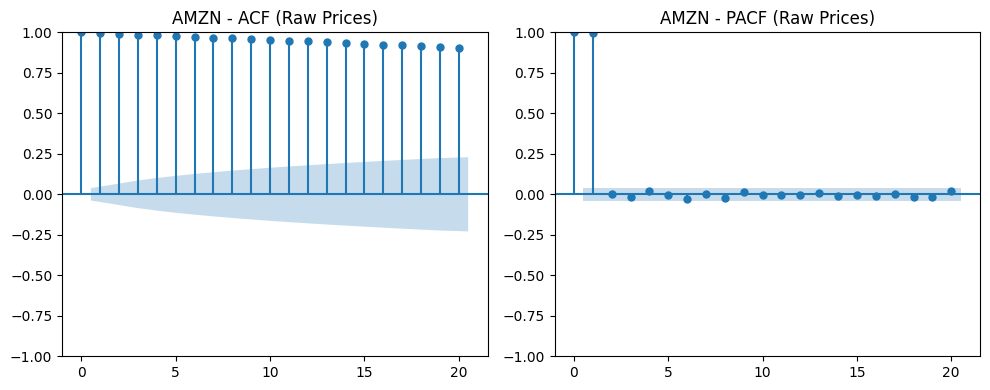

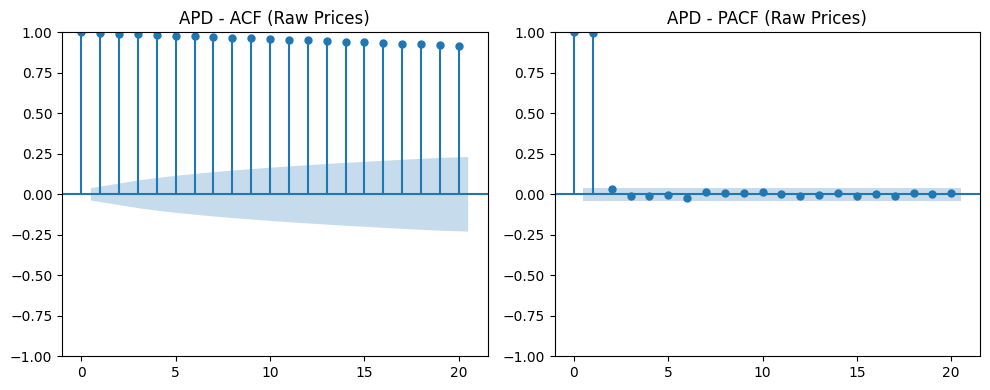

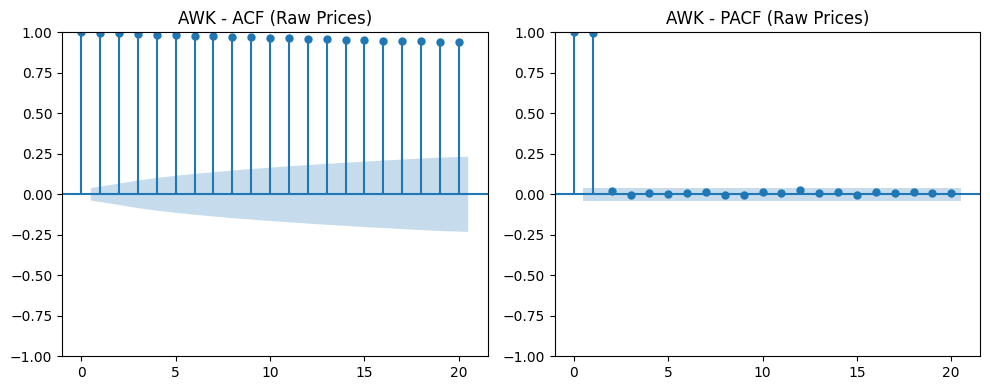

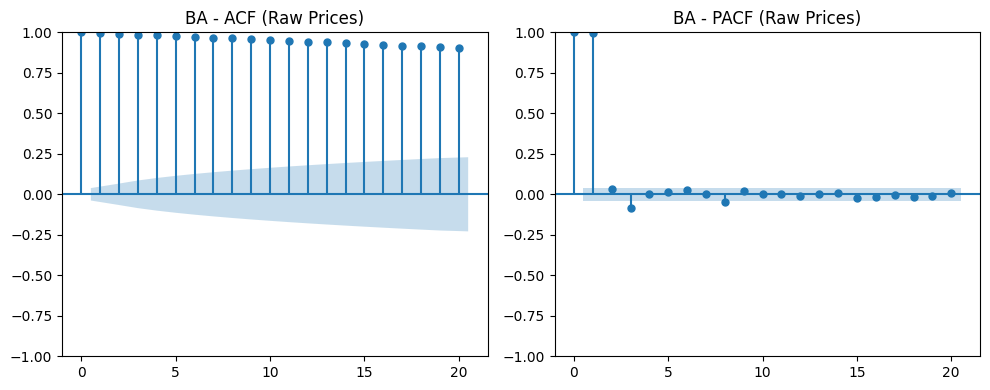

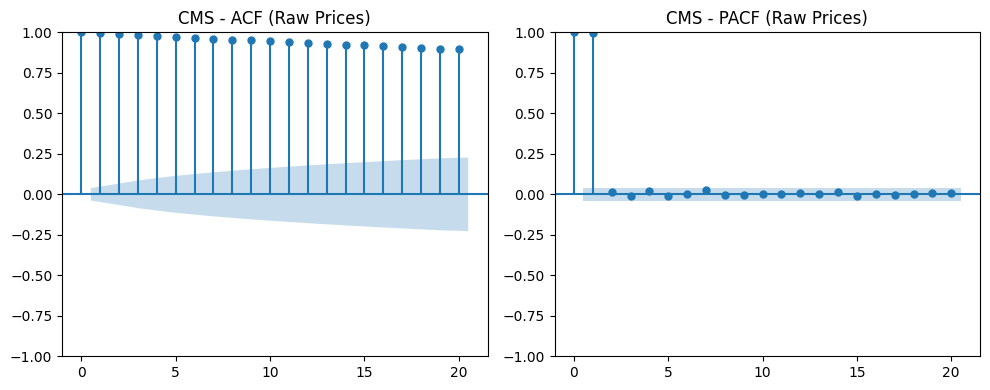

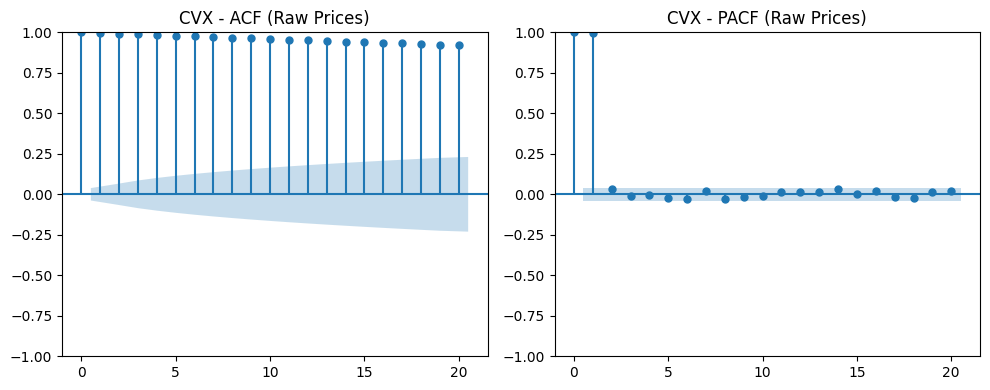

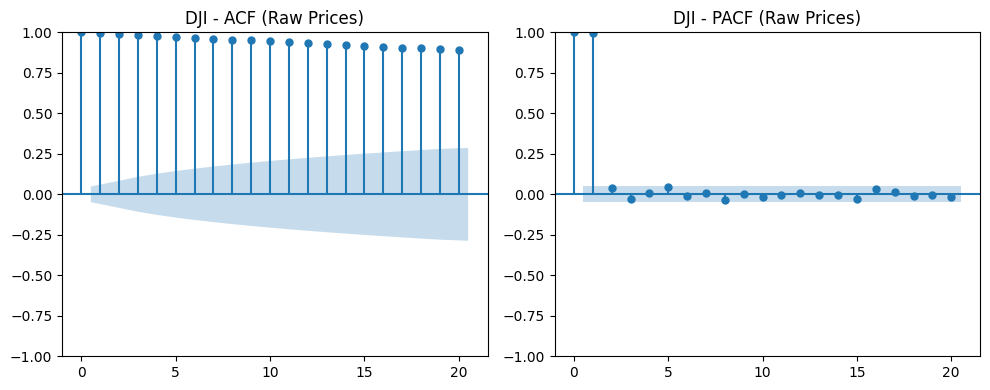

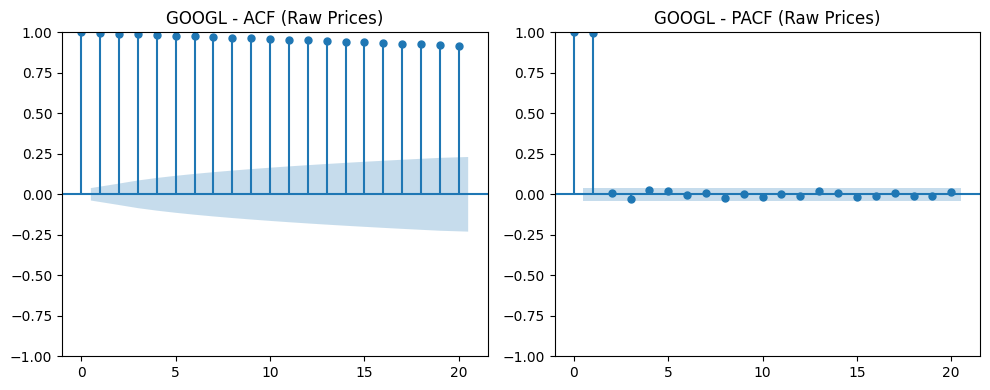

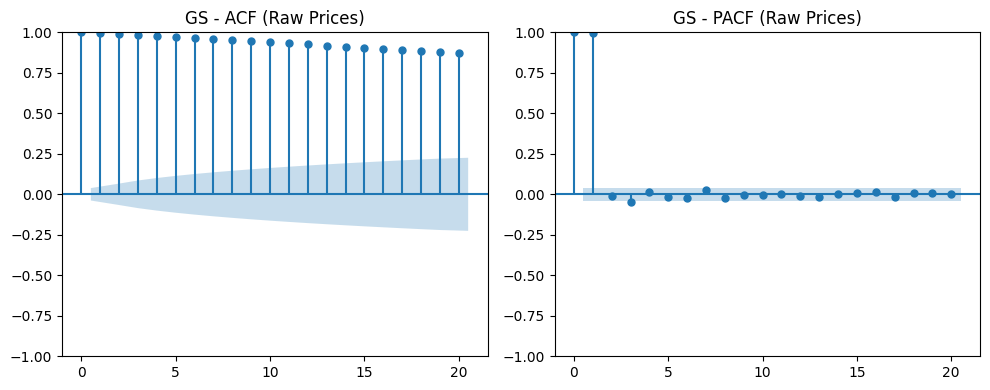

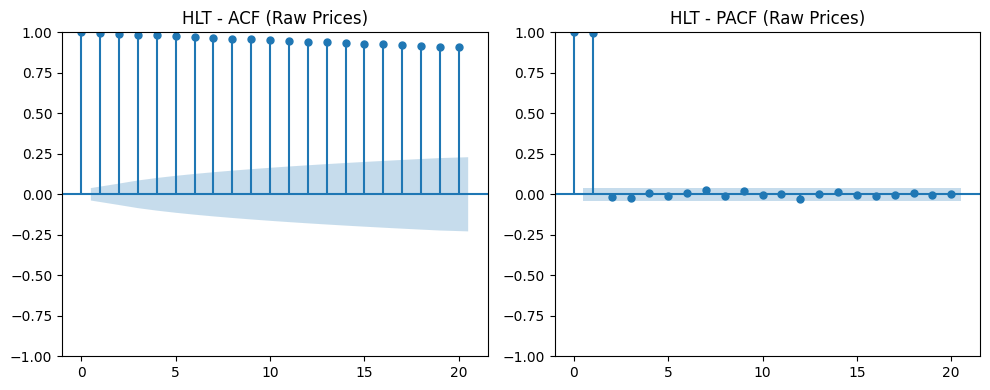

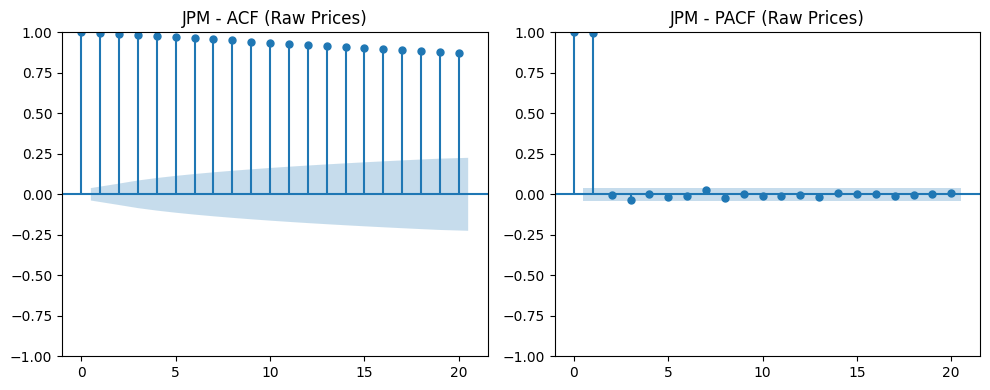

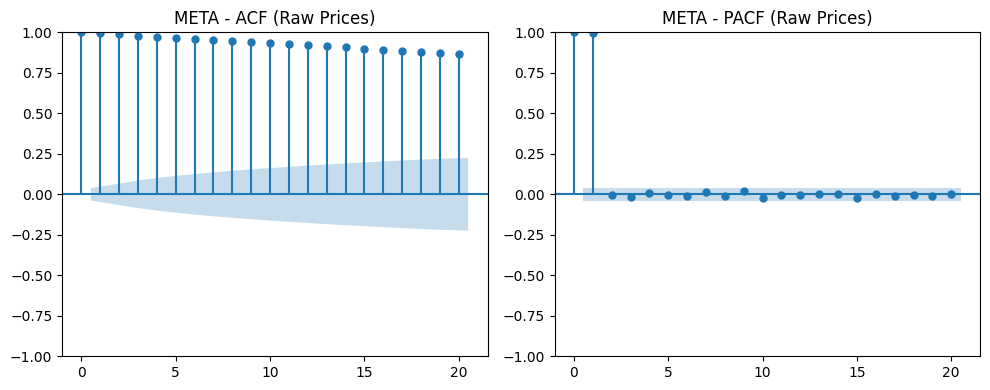

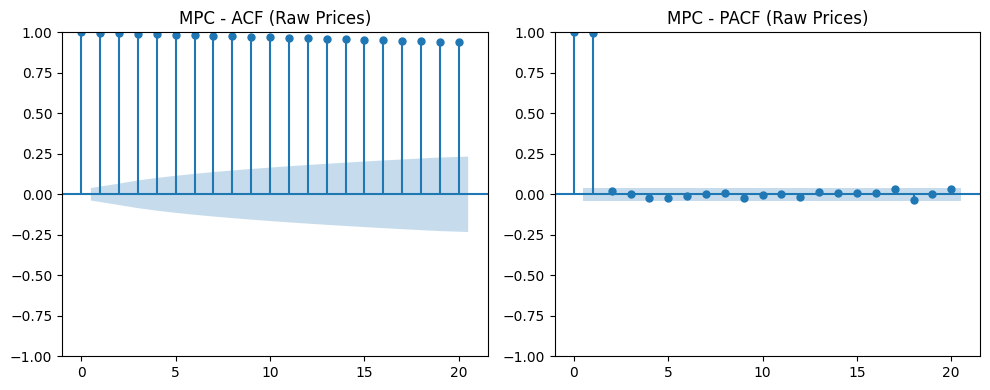

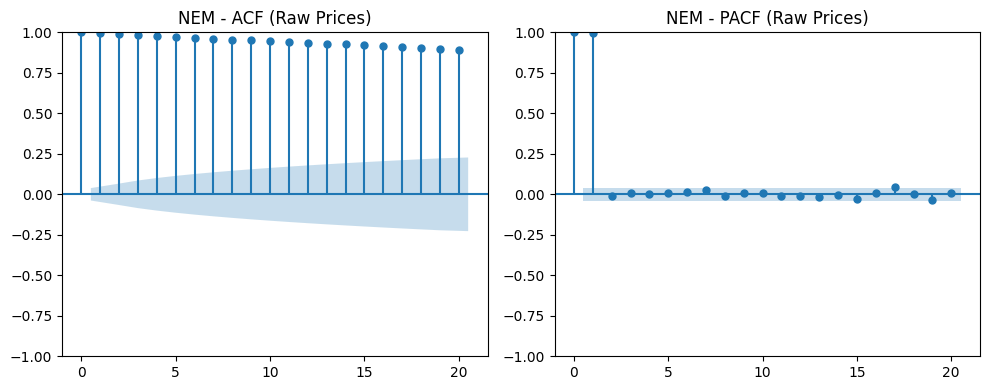

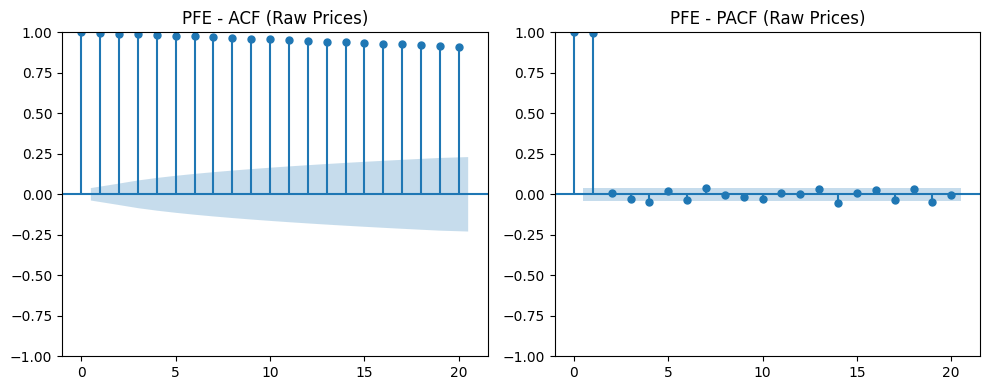

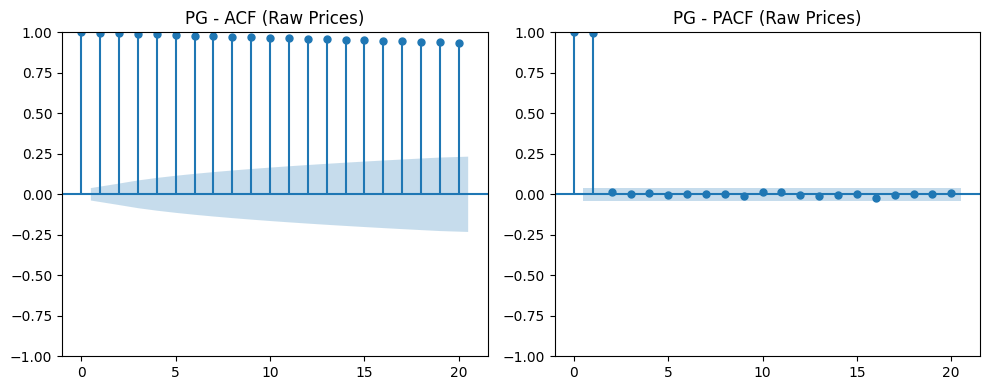

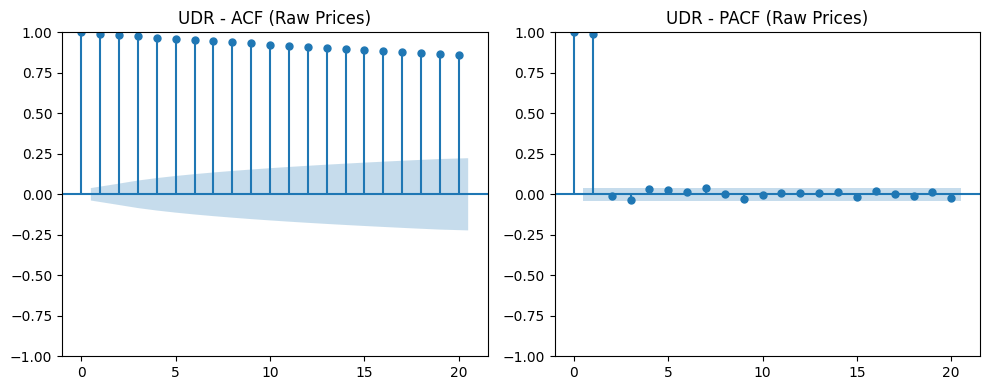

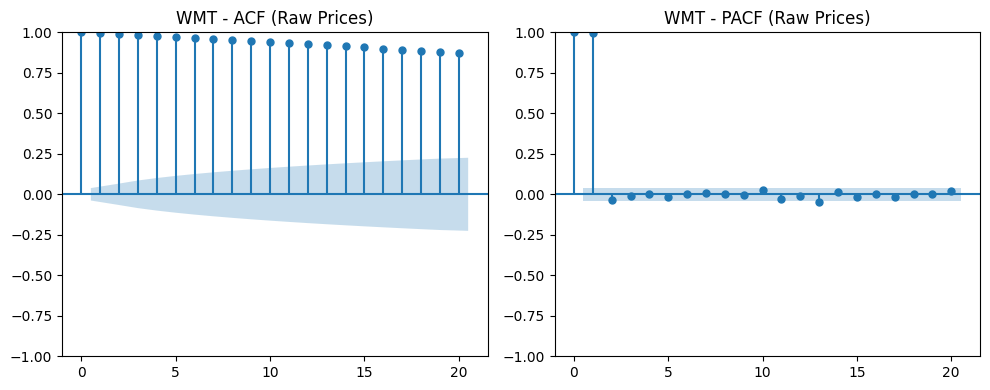

In [ ]:
# Plot ACF and PACF for raw closing prices of each stock
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Convert 'Date_x' to datetime and sort by stock and date
df['Date_x'] = pd.to_datetime(df['Date_x'])
df = df.sort_values(['Stock', 'Date_x'])

# Loop through each stock and generate ACF/PACF plots for raw closing prices
for stock, group in df.groupby('Stock'):
    prices = group['Close']  # raw closing price series for this stock

    # Create subplots: one for ACF and one for PACF
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    plot_acf(prices, ax=axes[0], lags=20)
    plot_pacf(prices, ax=axes[1], lags=20, method='ywm')

    # Set titles including the stock symbol for clarity
    axes[0].set_title(f'{stock} - ACF (Raw Prices)')
    axes[1].set_title(f'{stock} - PACF (Raw Prices)')

    plt.tight_layout()  # adjust layout for neatness
    plt.show()



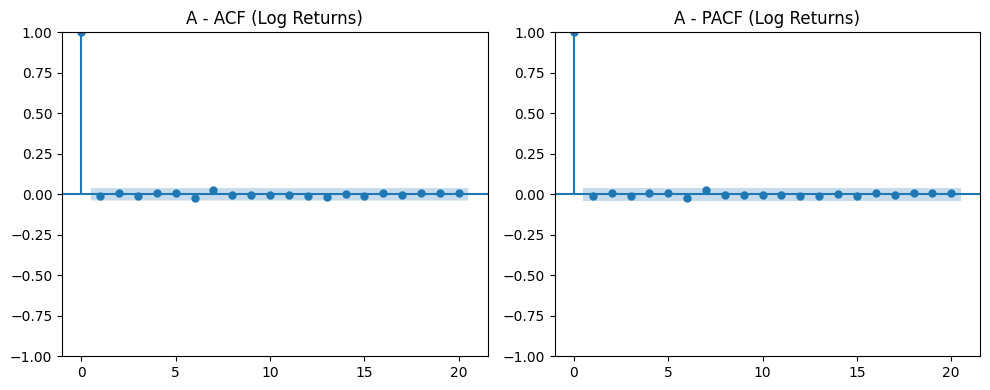

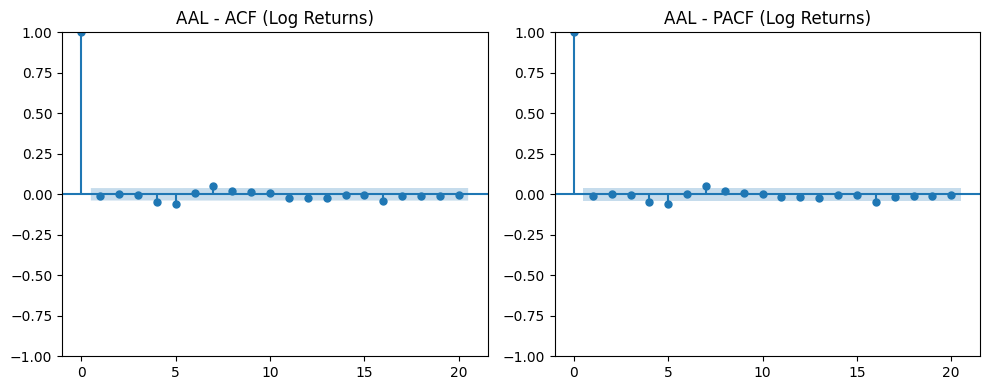

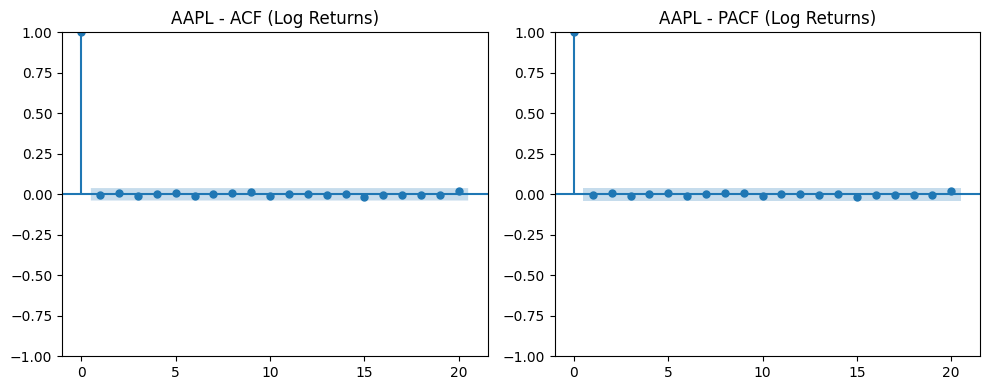

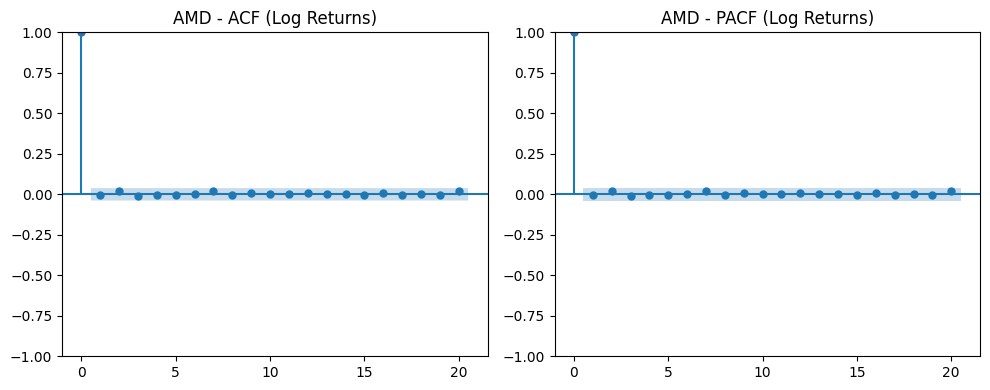

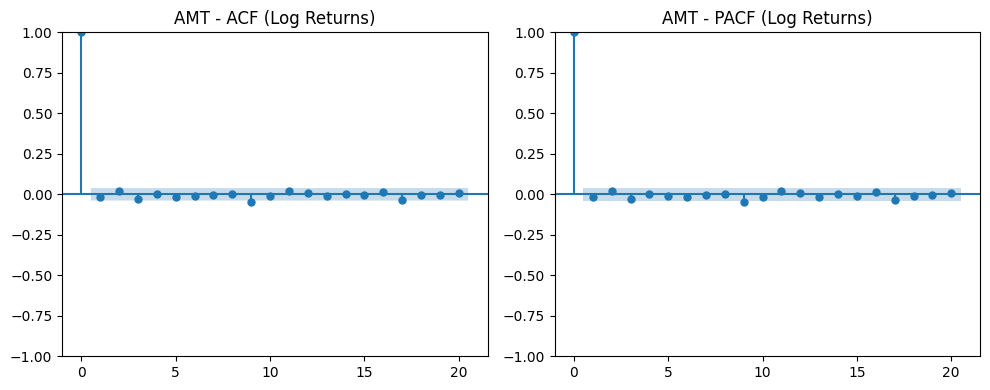

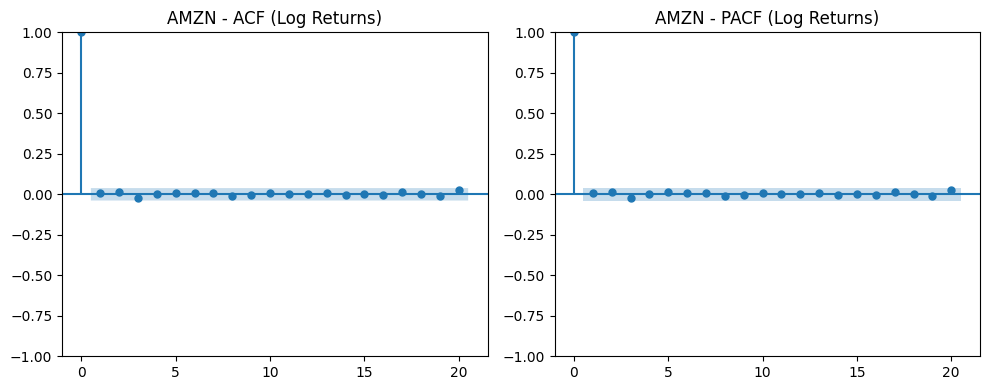

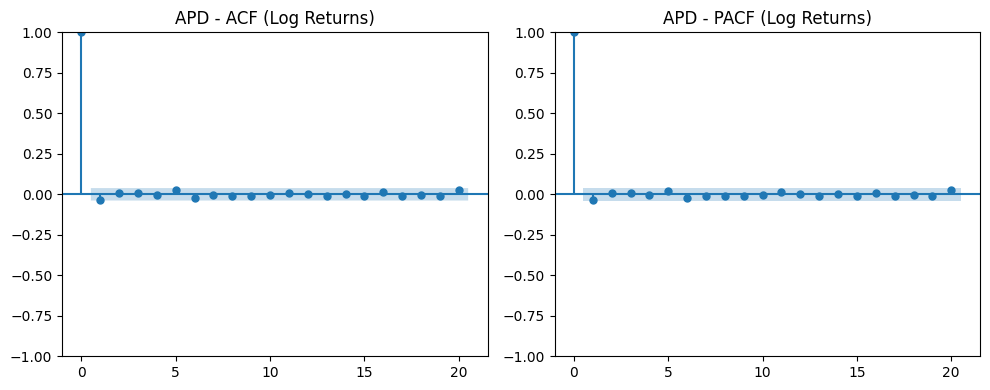

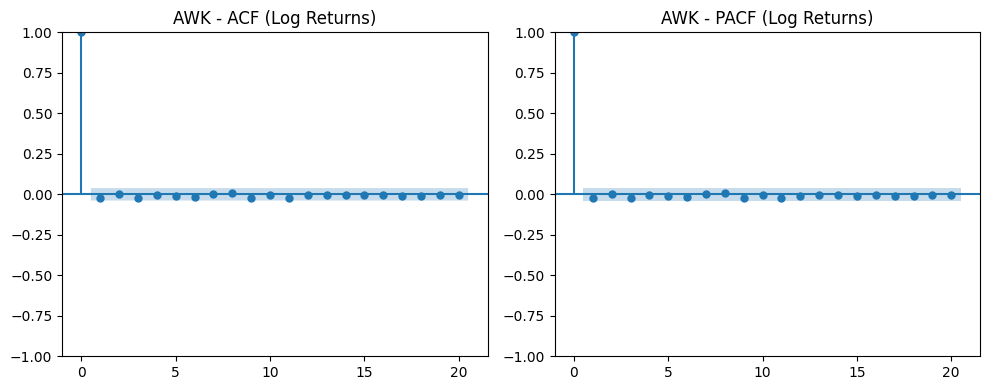

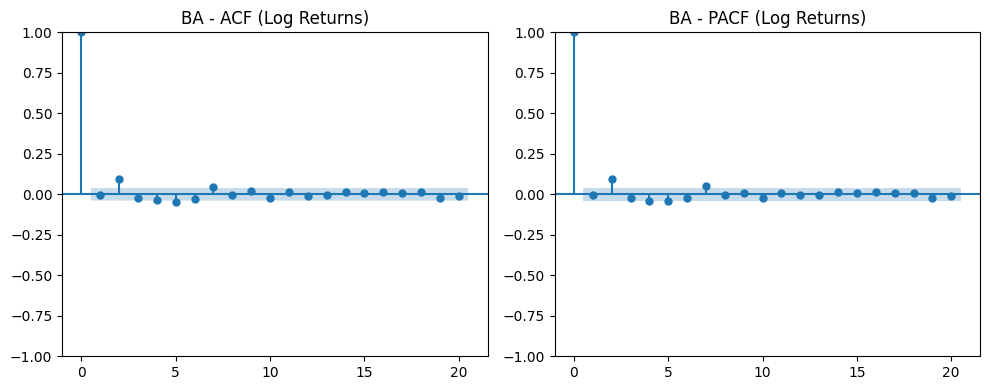

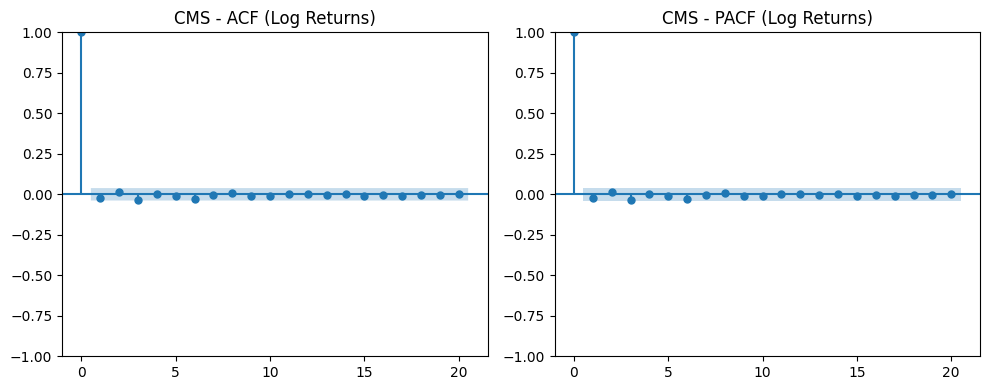

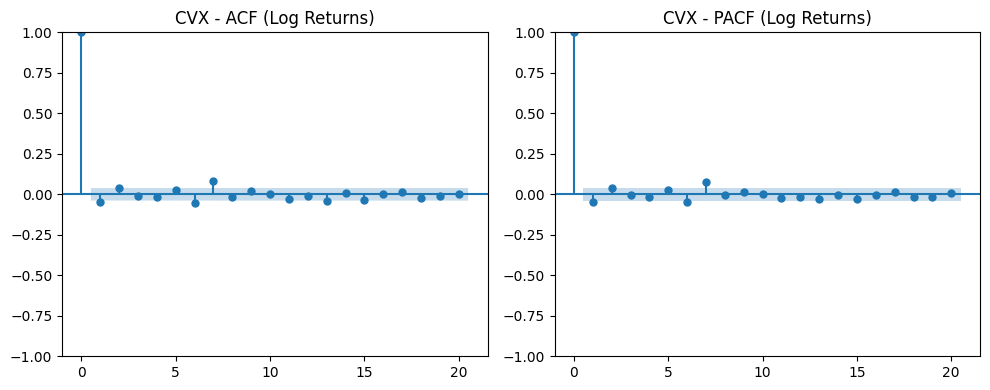

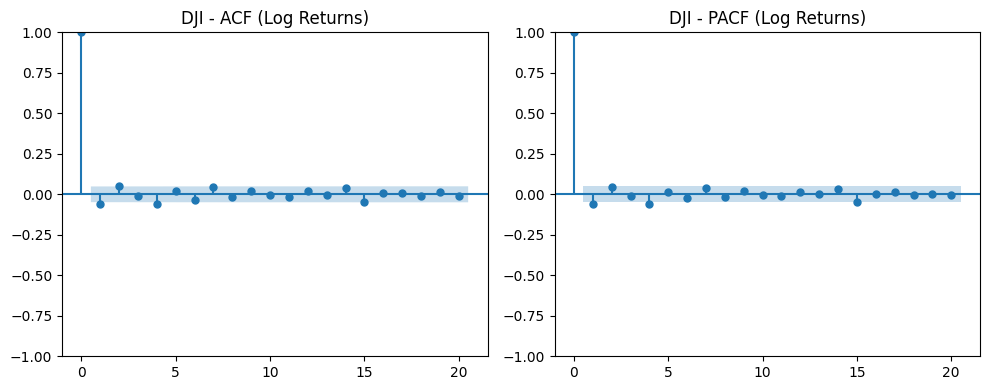

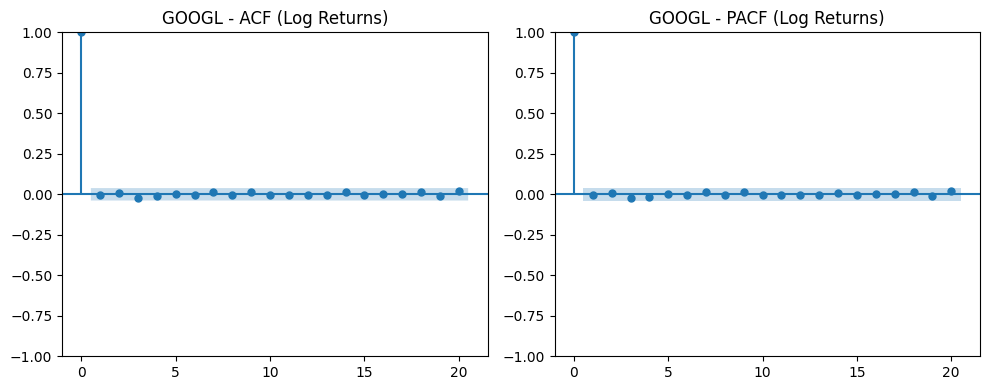

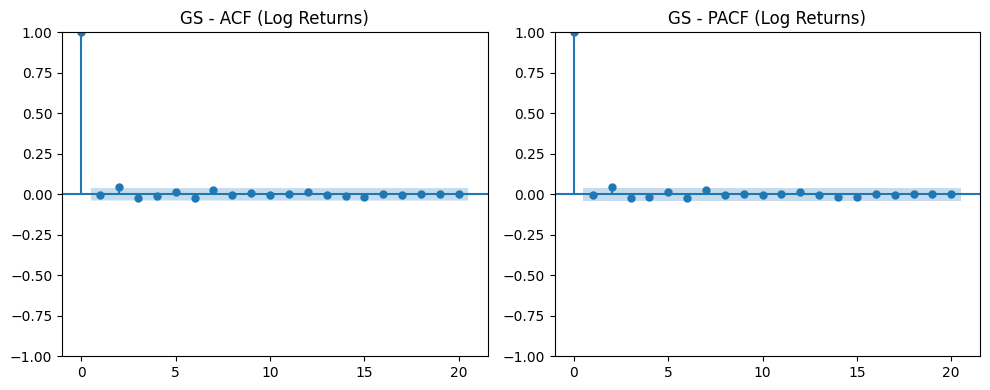

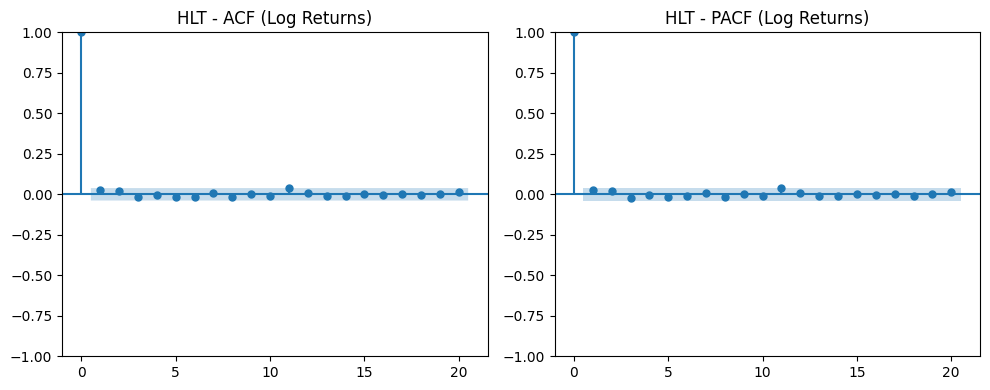

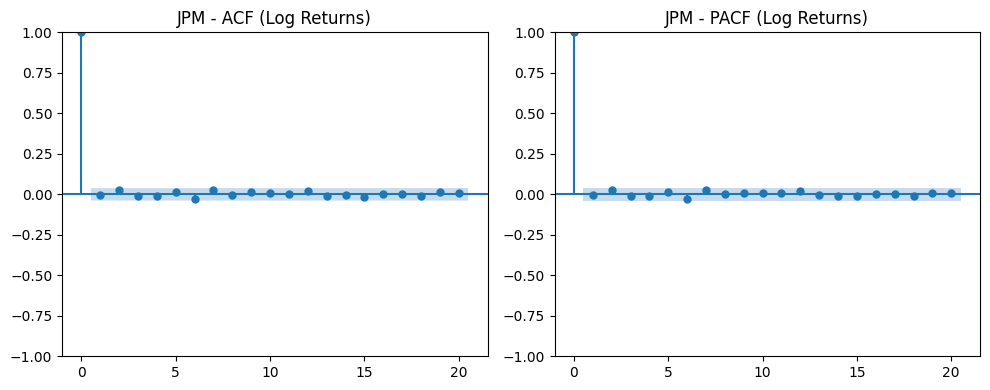

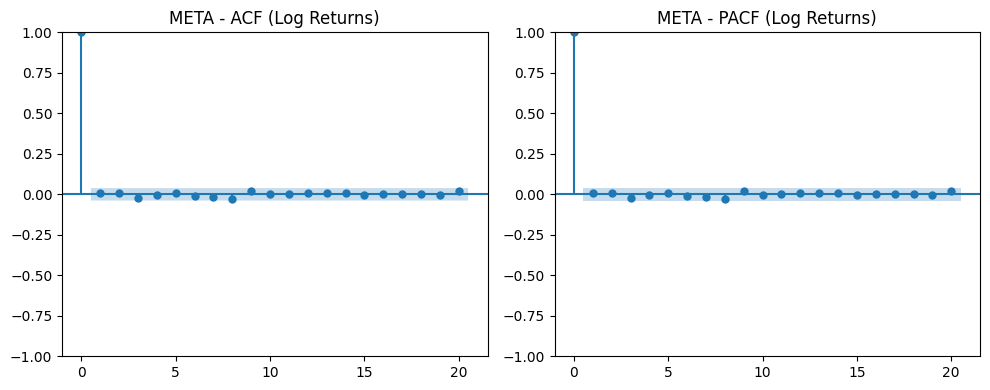

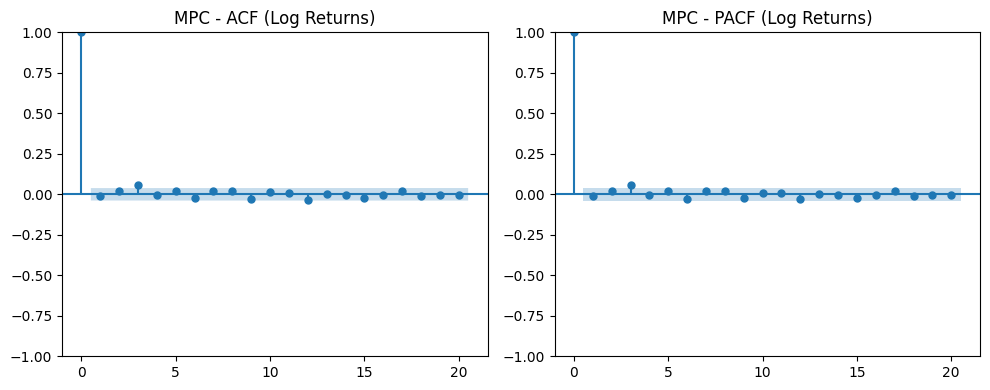

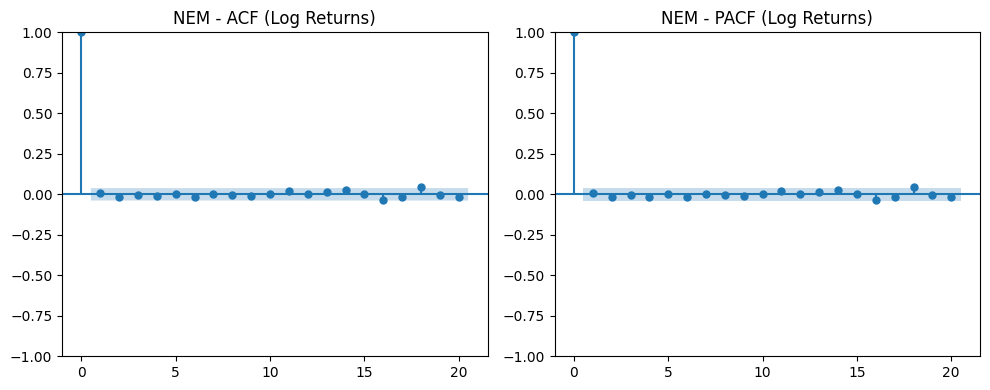

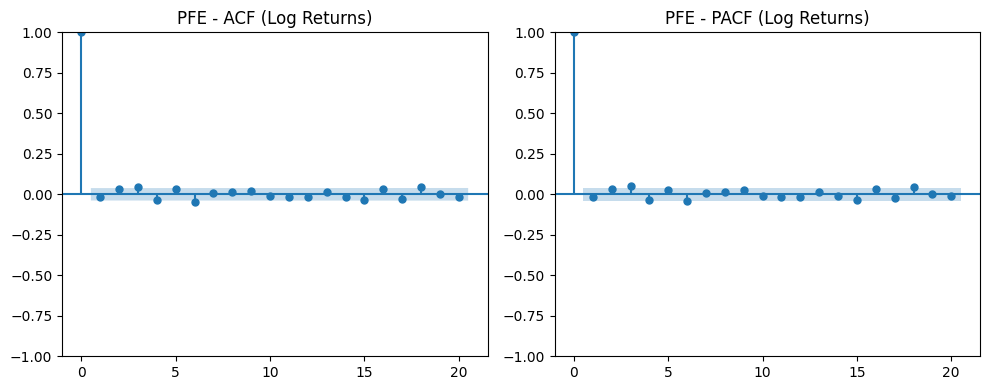

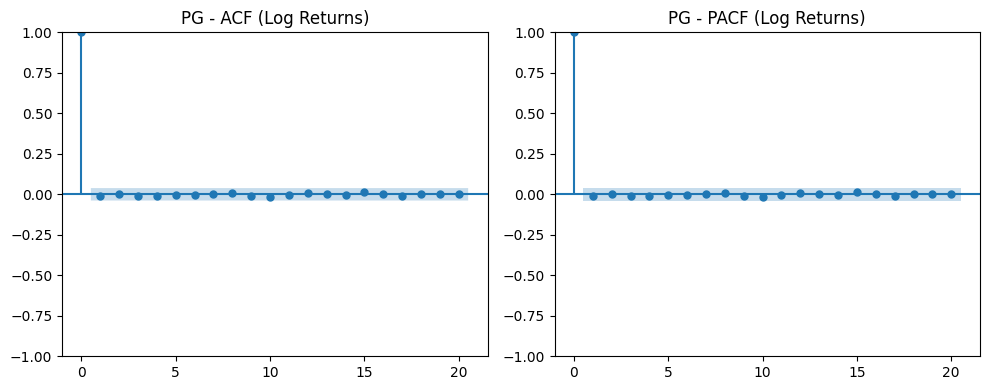

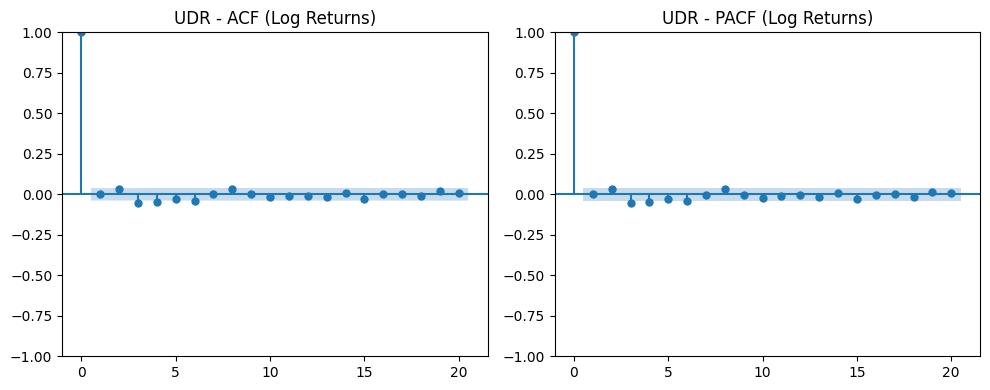

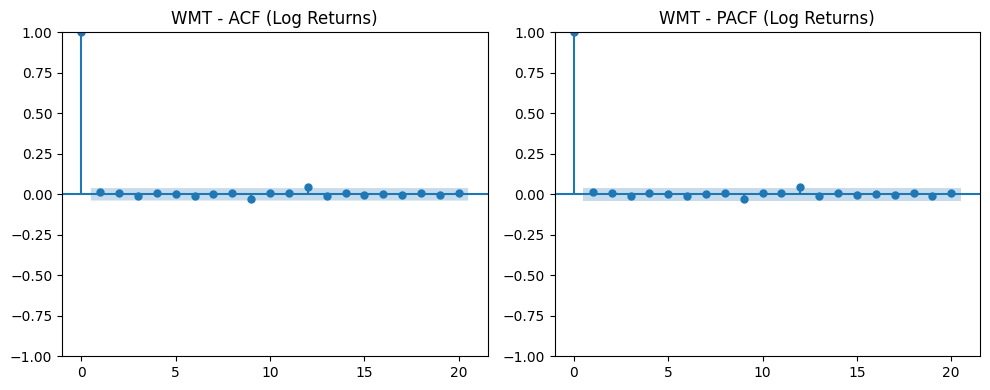

In [ ]:
# Plot ACF and PACF for log returns of each stock's closing price
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Convert 'Date_x' to datetime and sort by stock and date
df['Date_x'] = pd.to_datetime(df['Date_x'])
df = df.sort_values(['Stock', 'Date_x'])

# Calculate log returns for each stock and add as a new column
df['LogReturn'] = df.groupby('Stock')['Close'].transform(lambda x: np.log(x).diff())

# Drop any NaN values resulting from the log return calculation (e.g., the first entry of each stock)
df = df.dropna(subset=['LogReturn'])

# Loop through each stock and generate ACF/PACF plots for log returns
for stock, group in df.groupby('Stock'):
    returns = group['LogReturn']  # log return series for this stock

    # Create subplots: one for ACF and one for PACF
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    plot_acf(returns, ax=axes[0], lags=20)
    plot_pacf(returns, ax=axes[1], lags=20, method='ywm')

    # Set titles including the stock symbol for clarity
    axes[0].set_title(f'{stock} - ACF (Log Returns)')
    axes[1].set_title(f'{stock} - PACF (Log Returns)')

    plt.tight_layout()  # adjust layout for neatness
    plt.show()

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

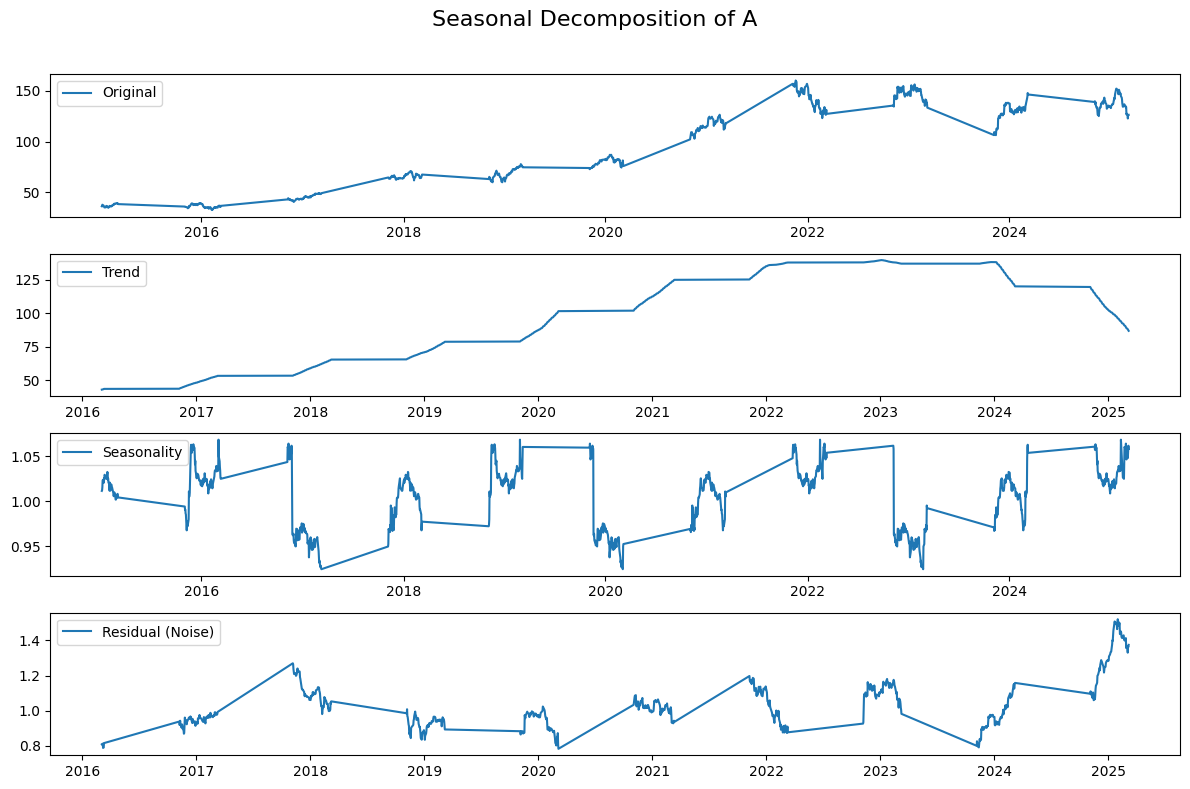

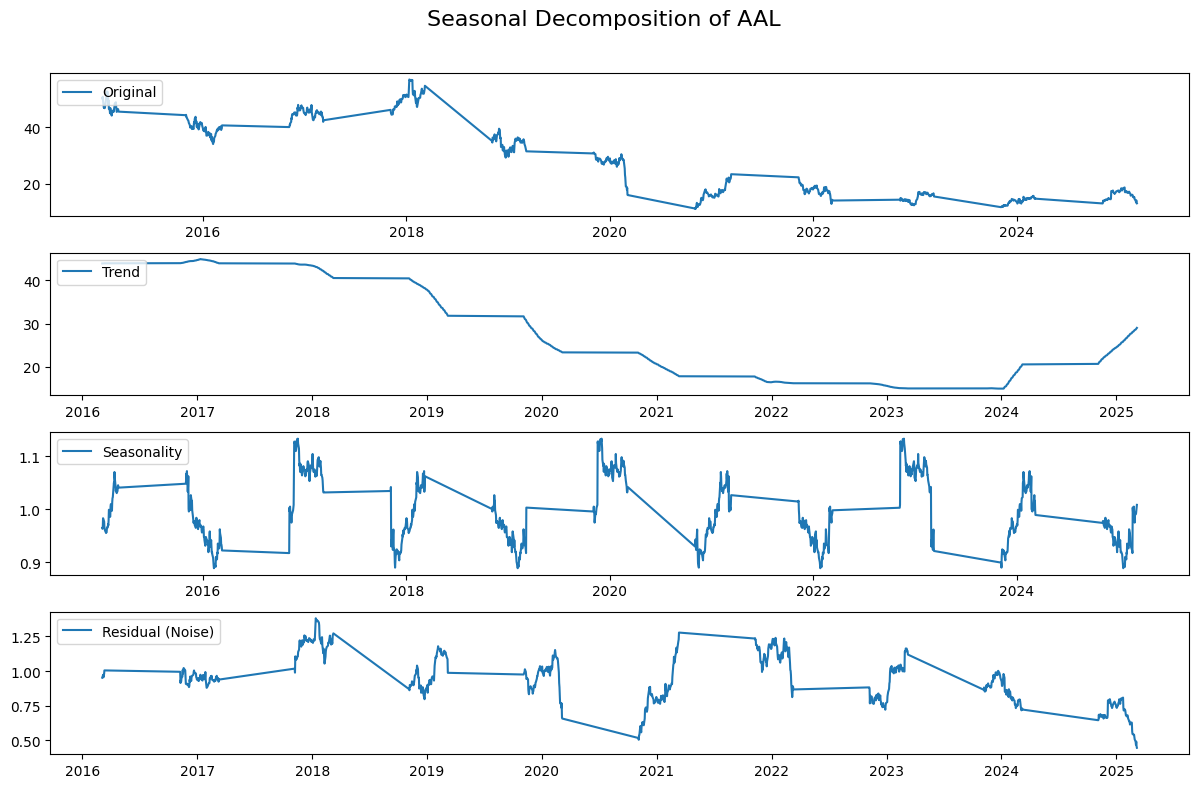

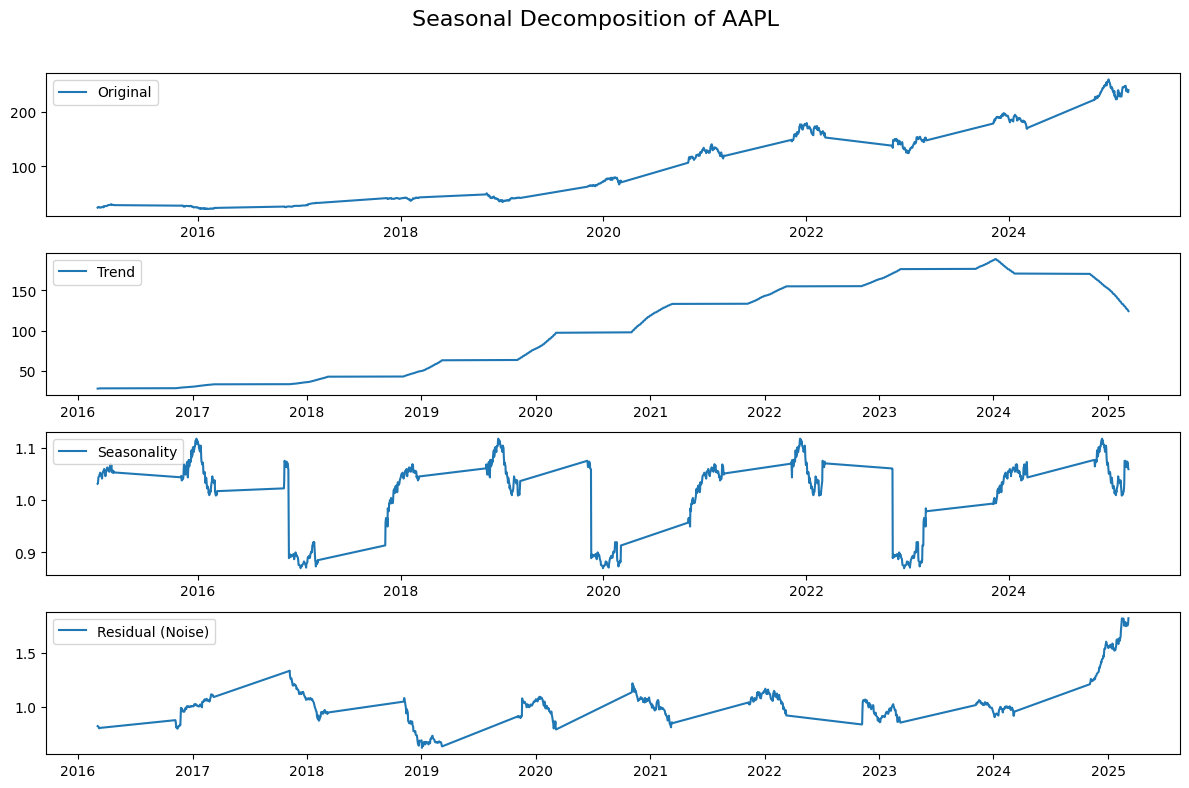

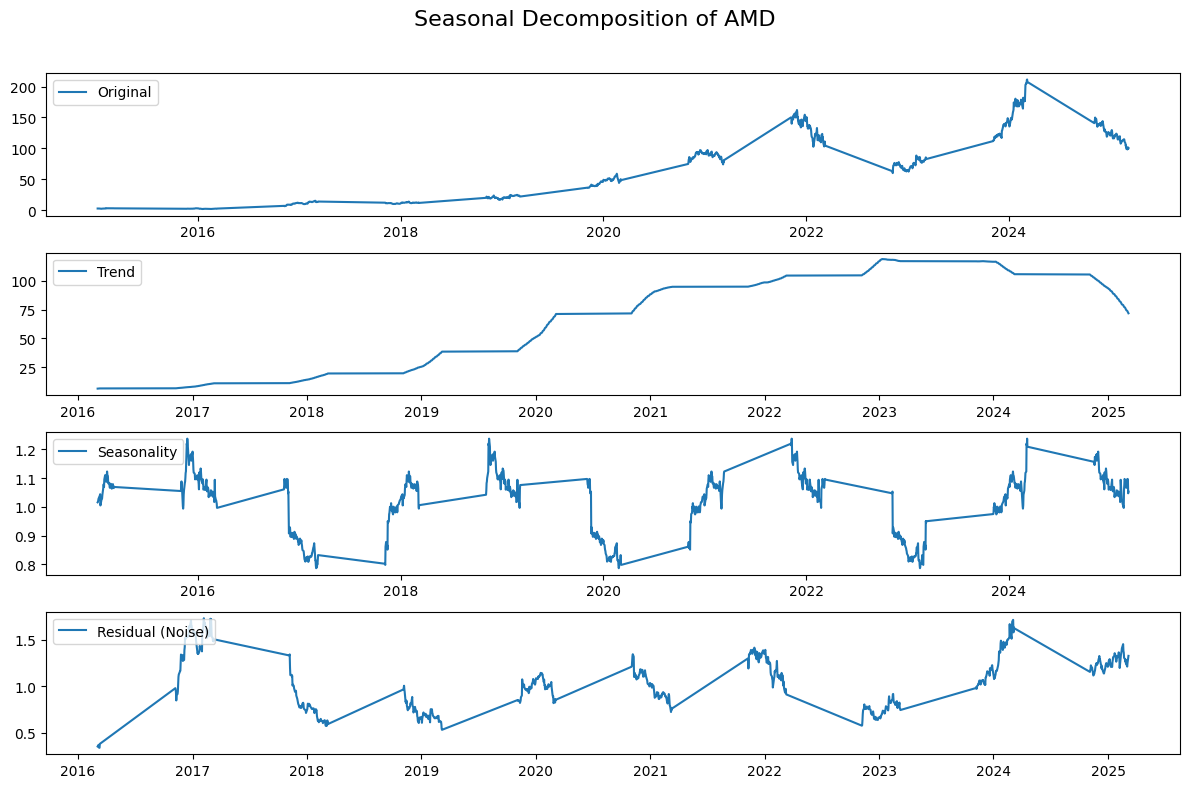

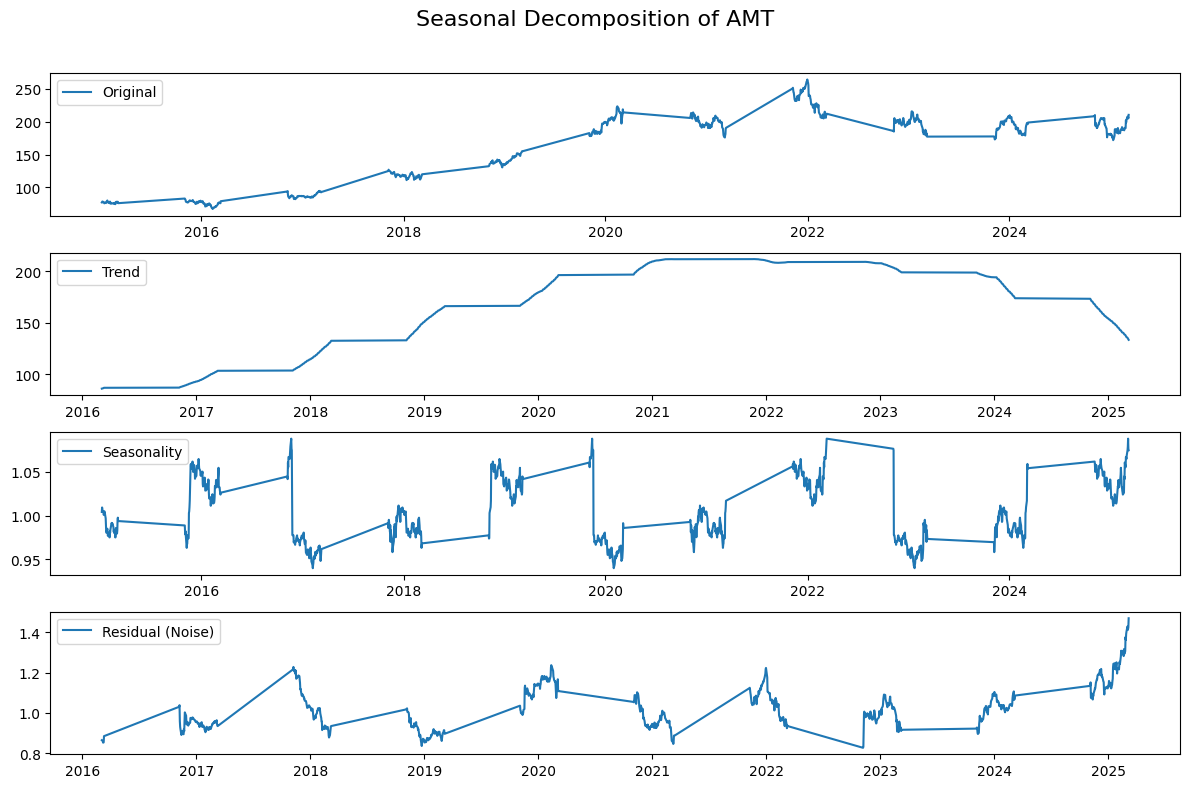

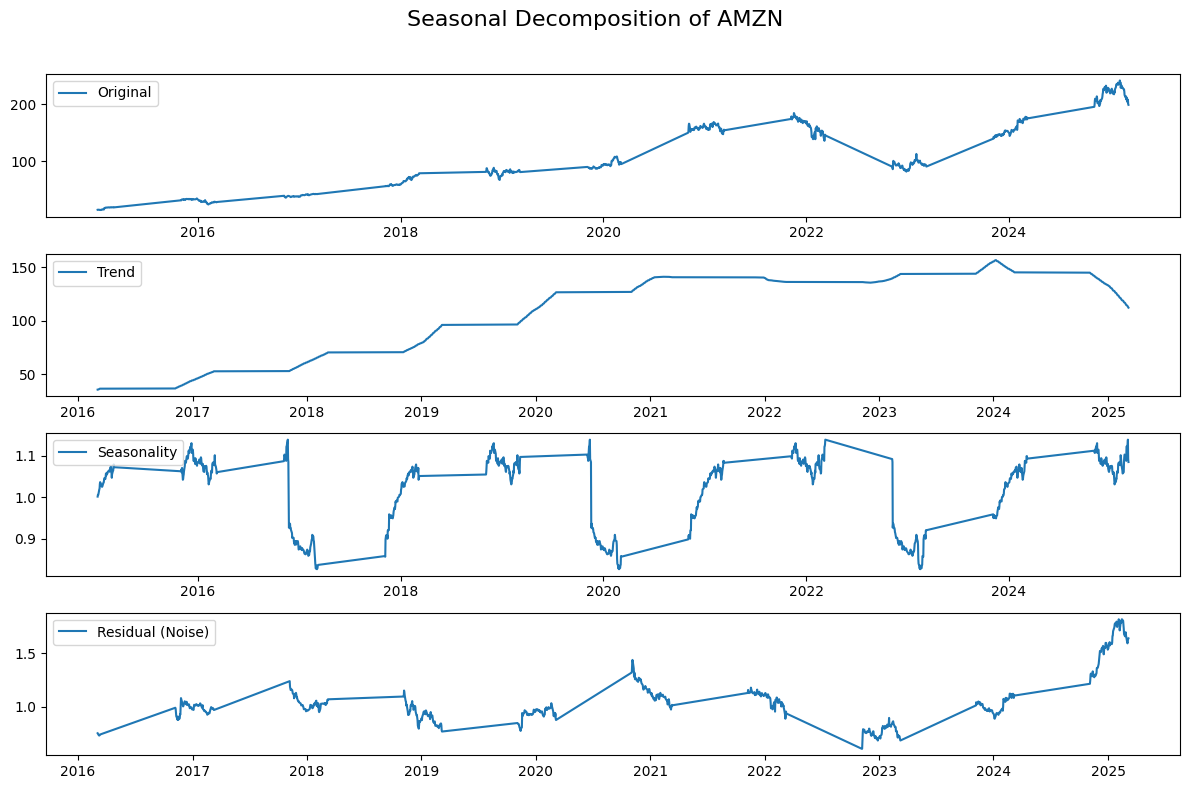

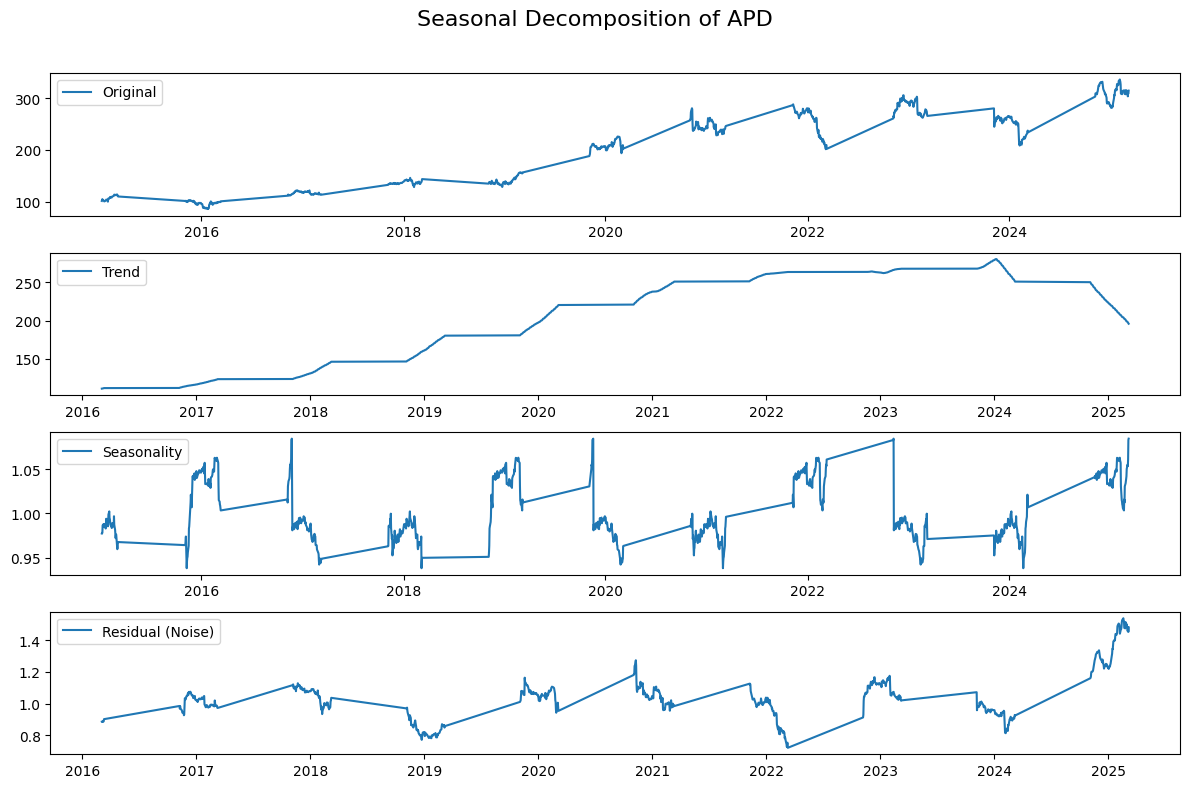

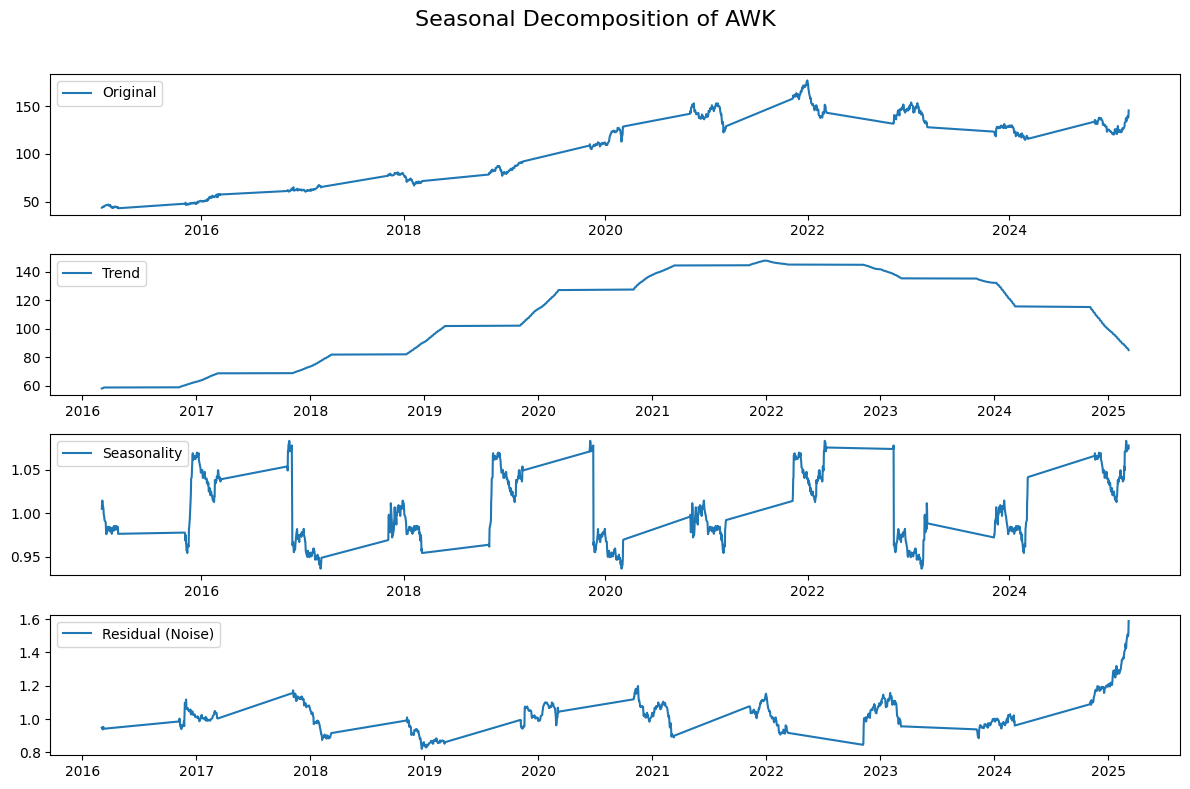

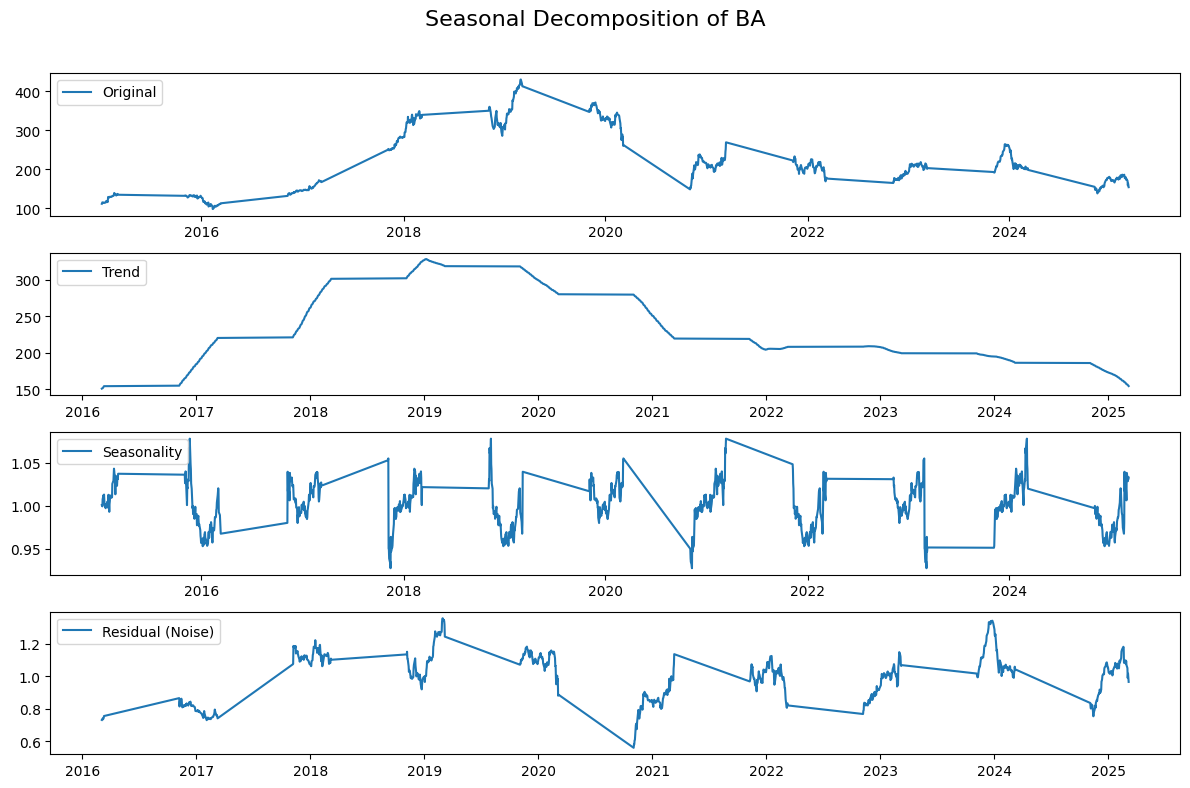

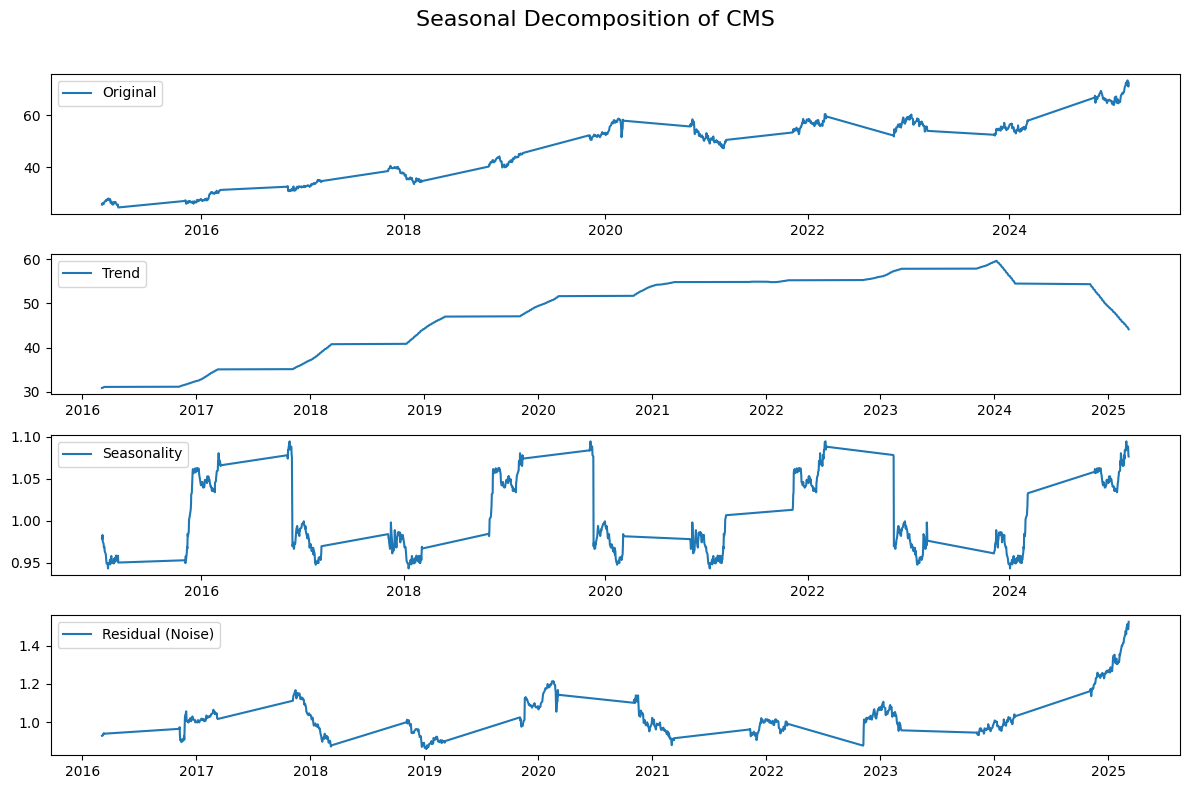

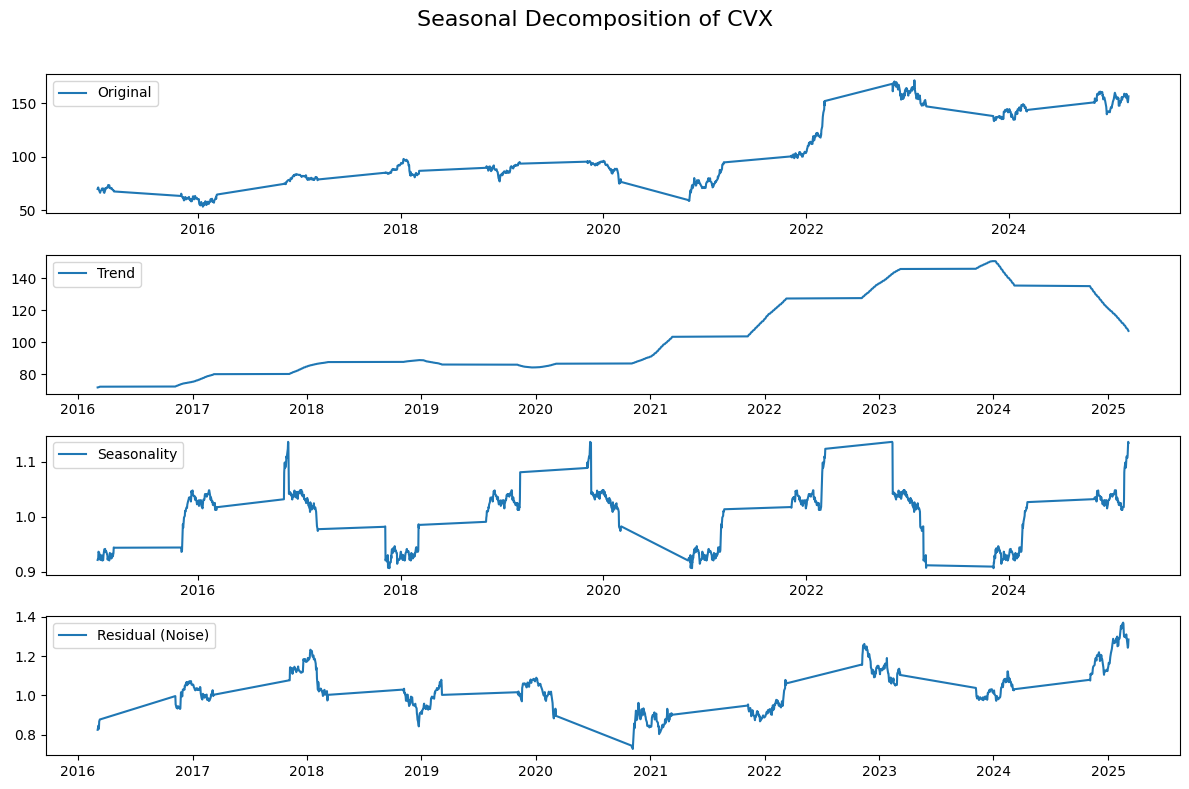

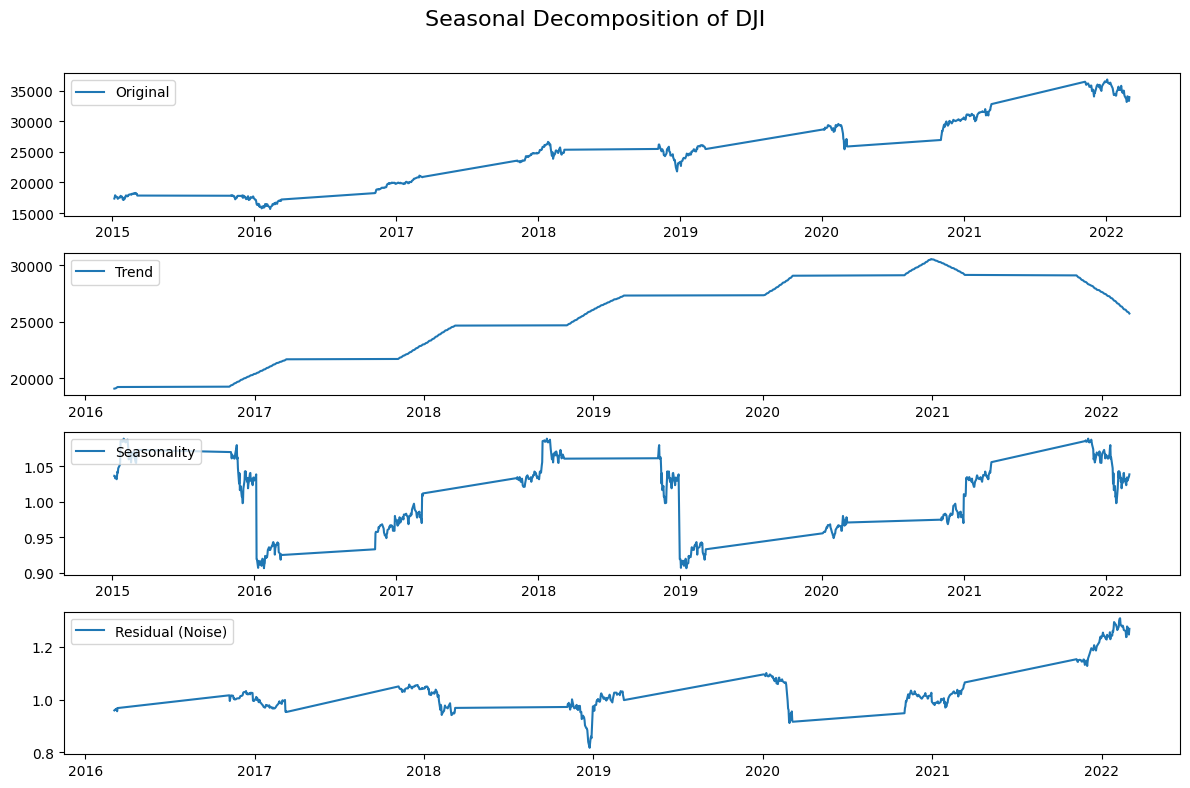

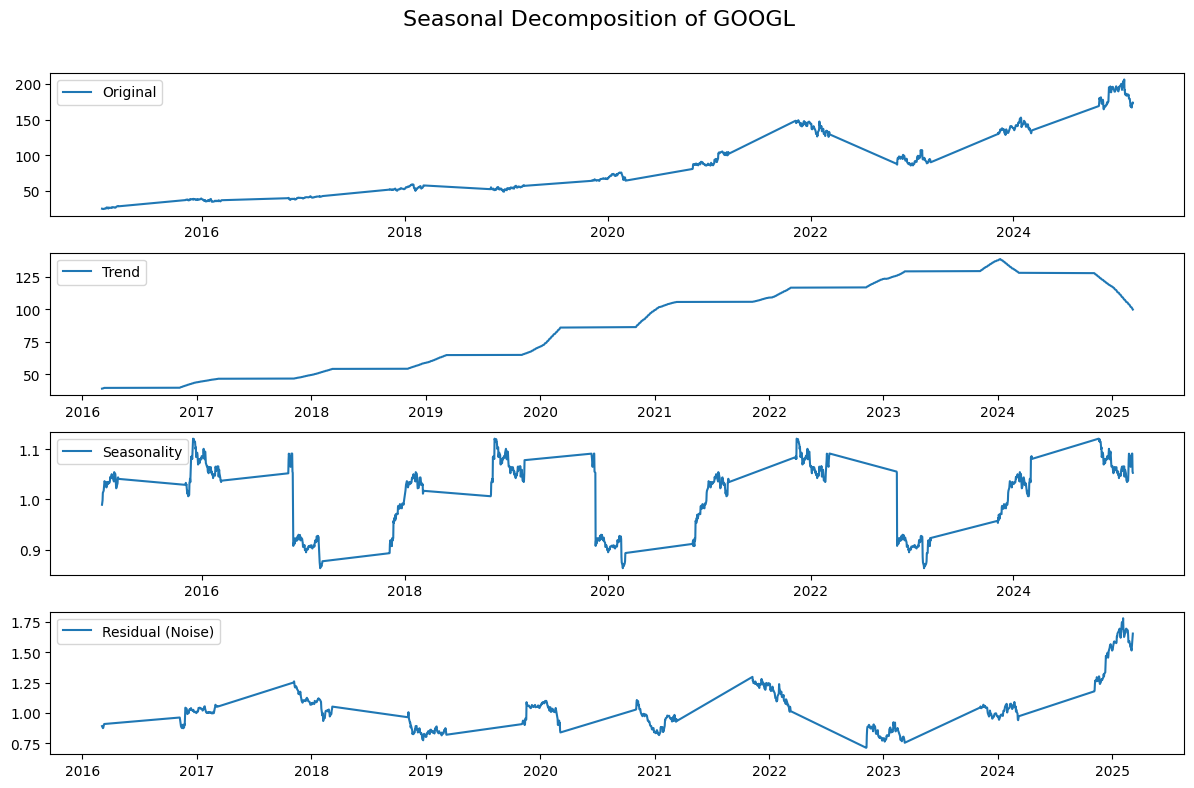

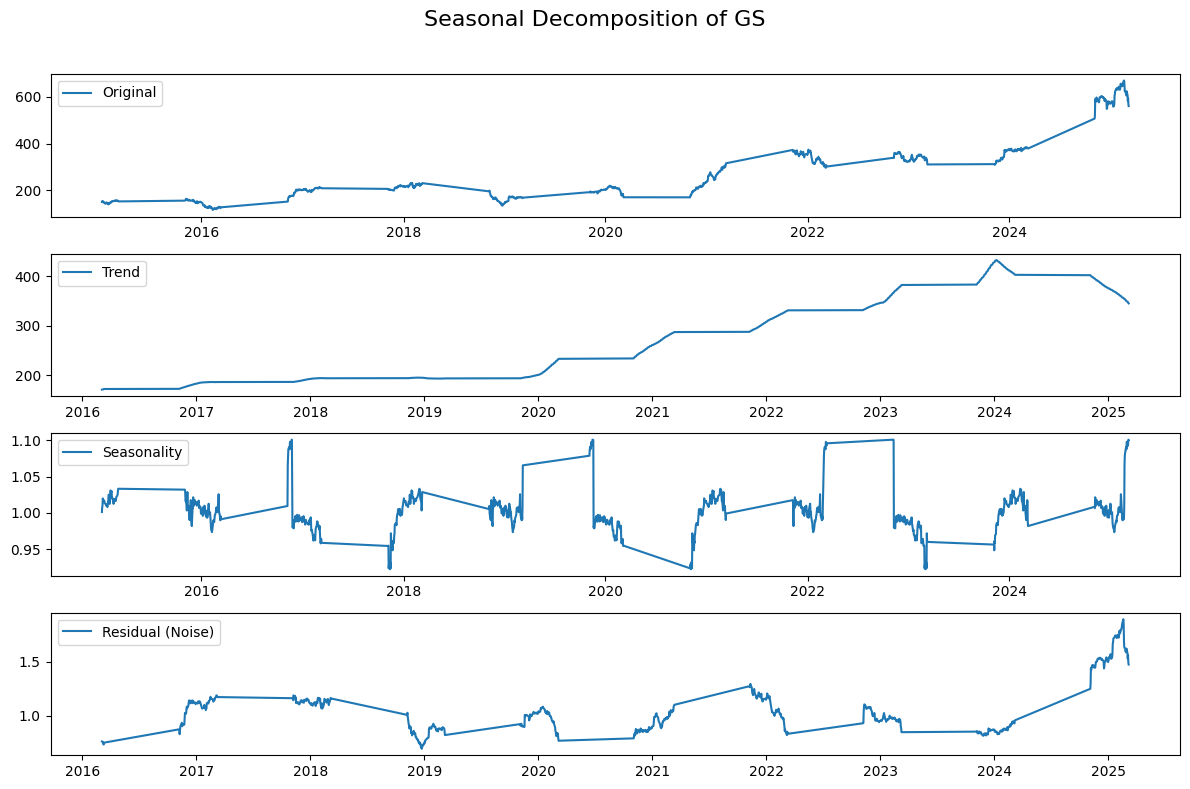

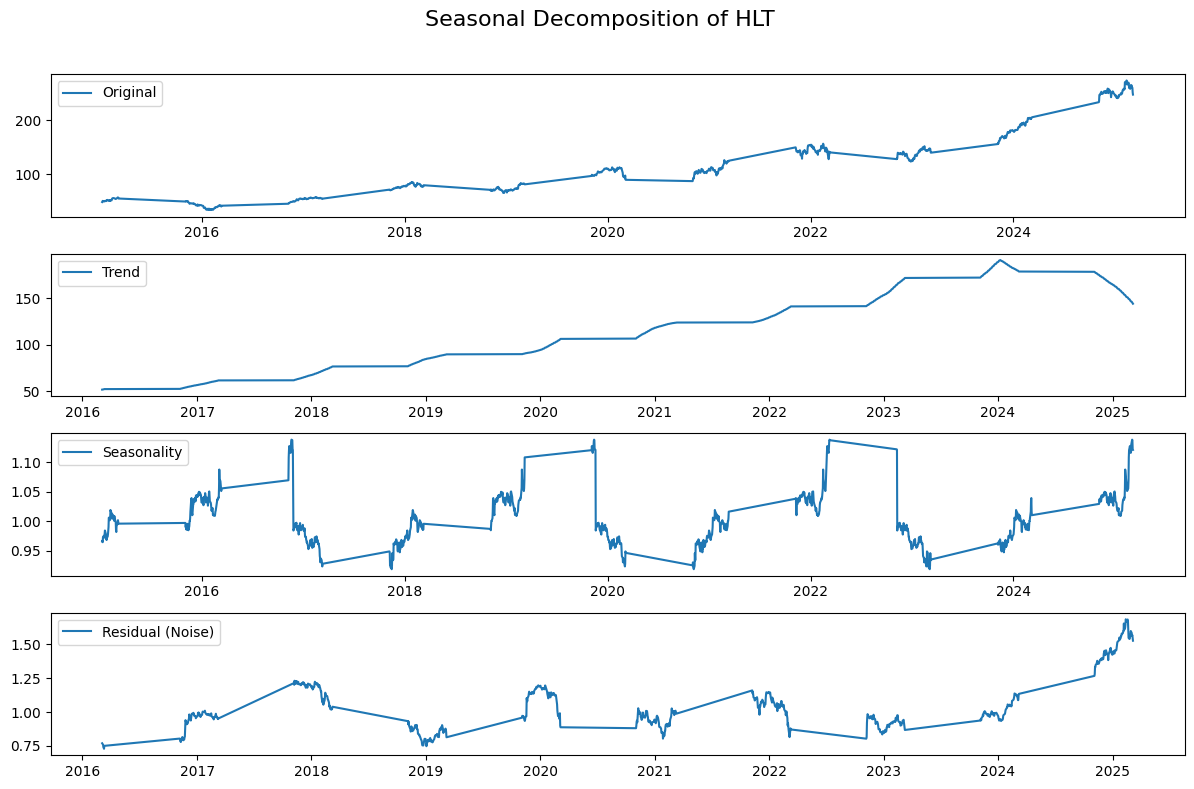

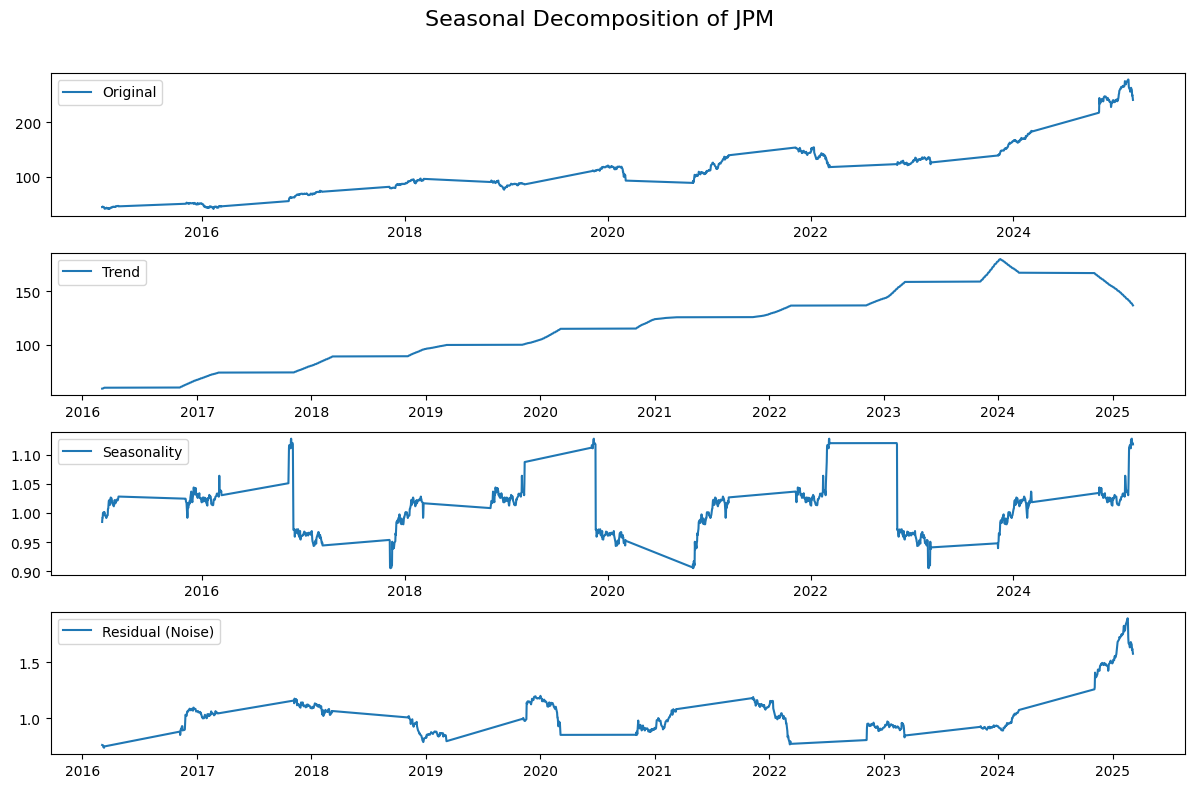

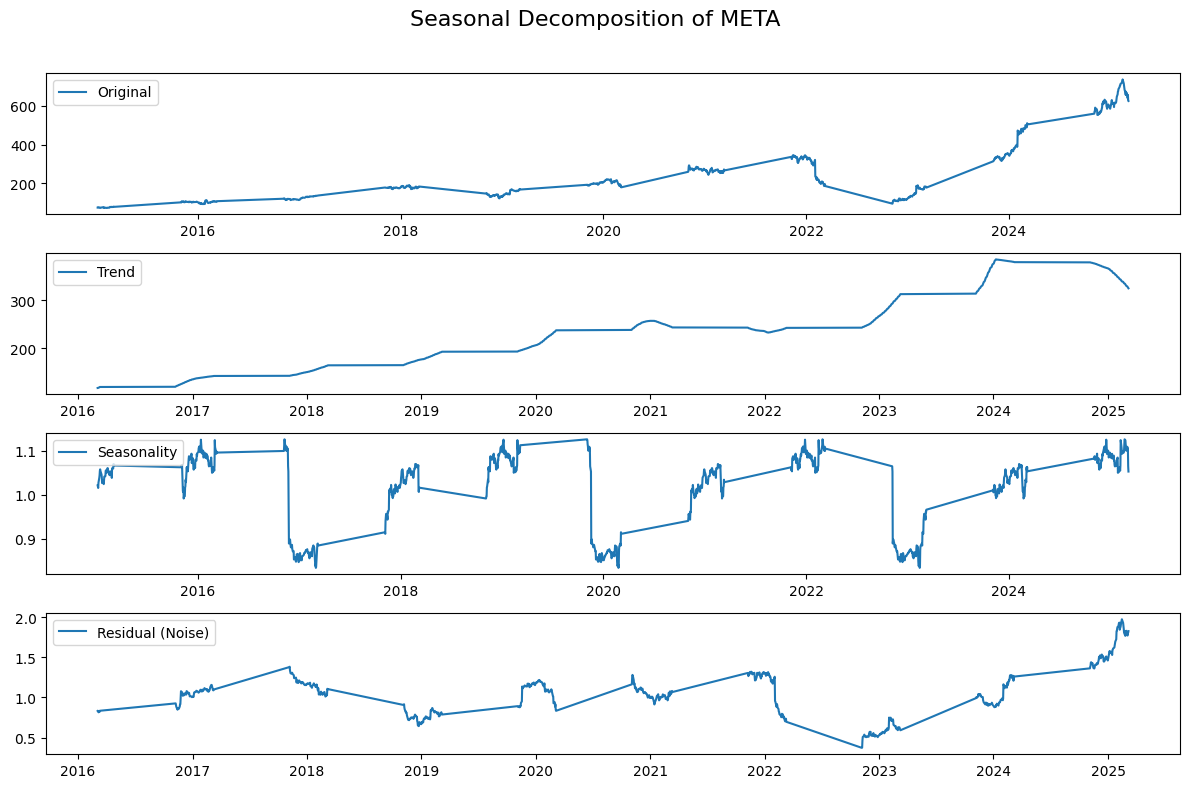

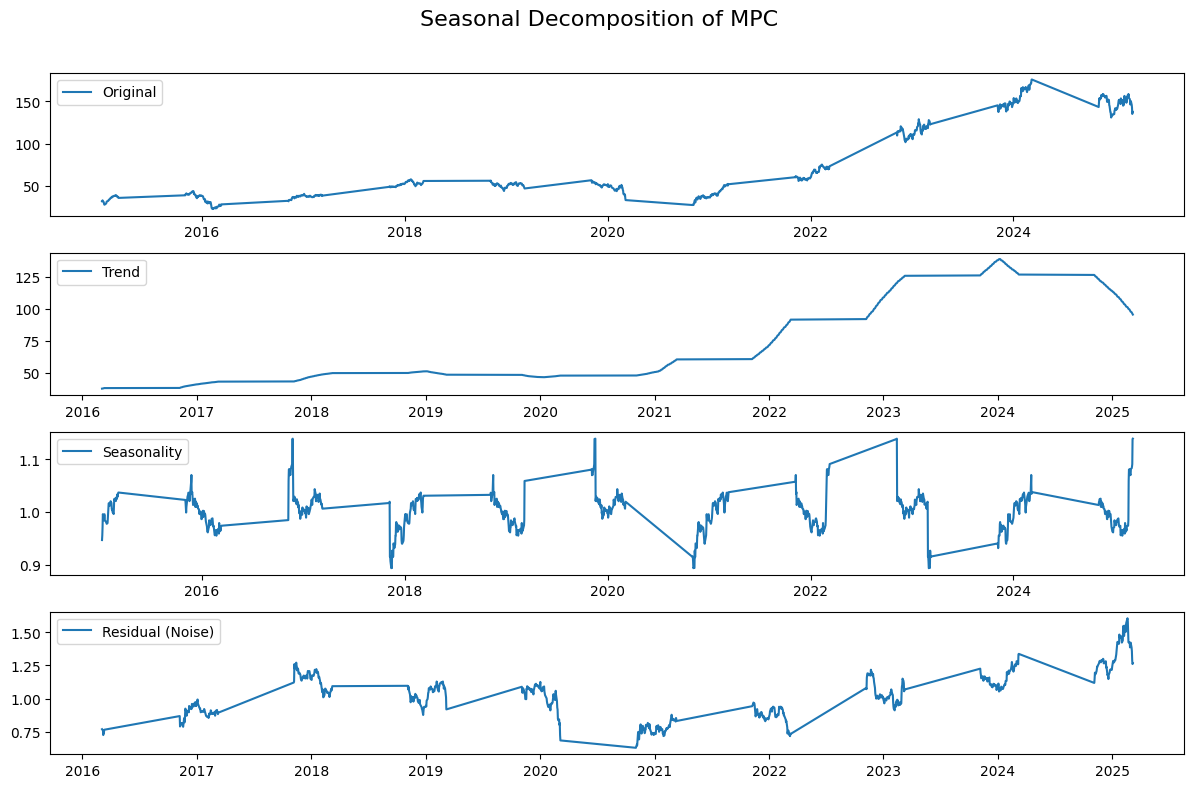

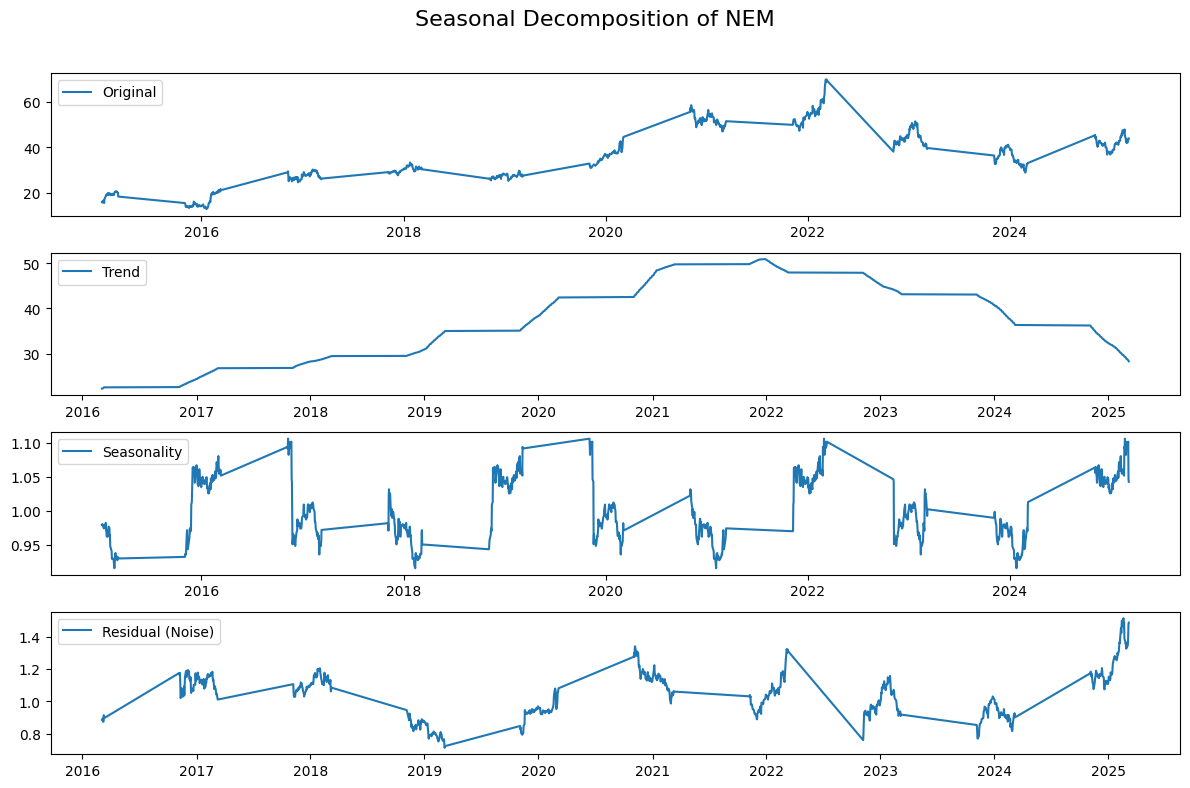

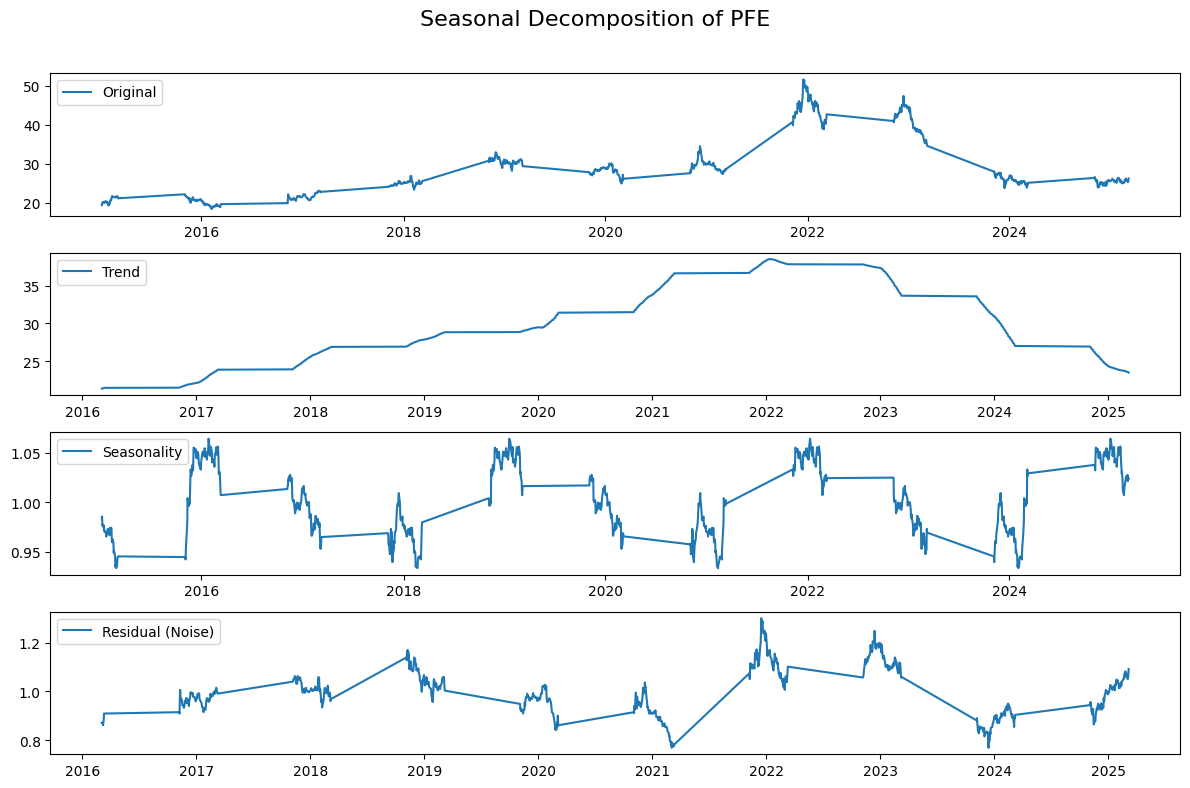

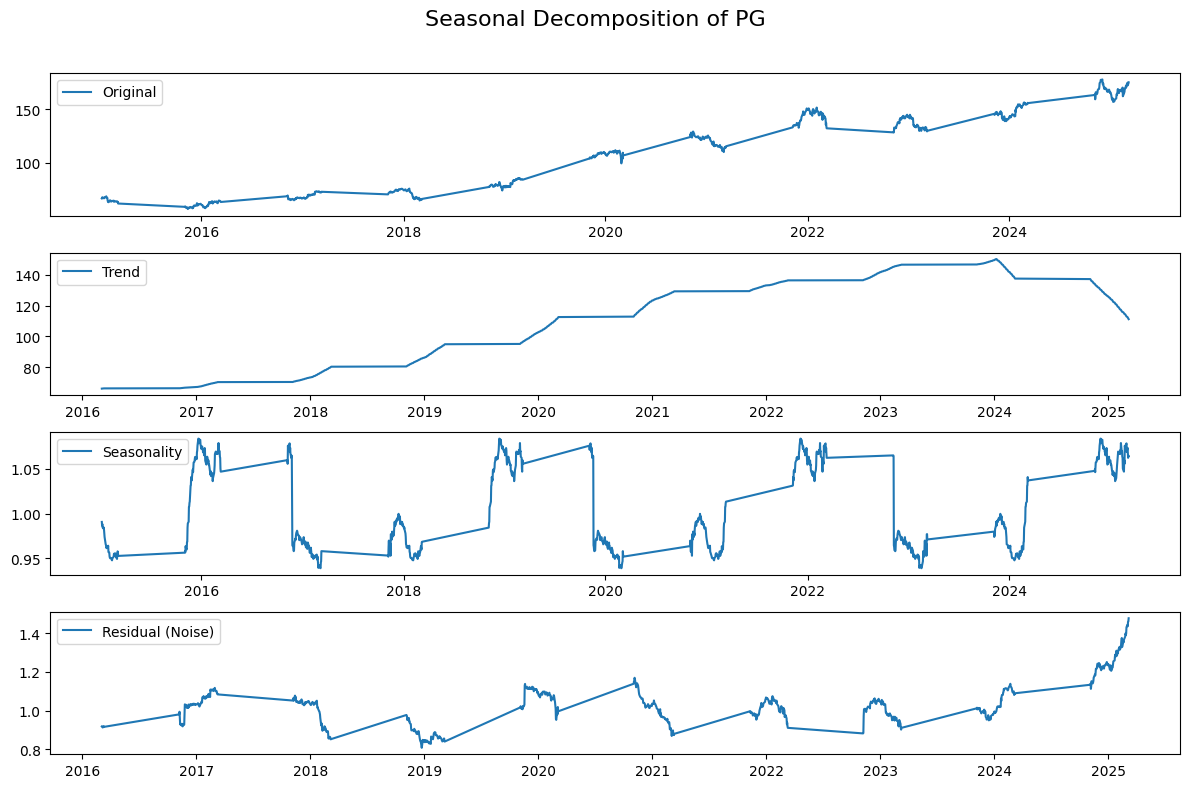

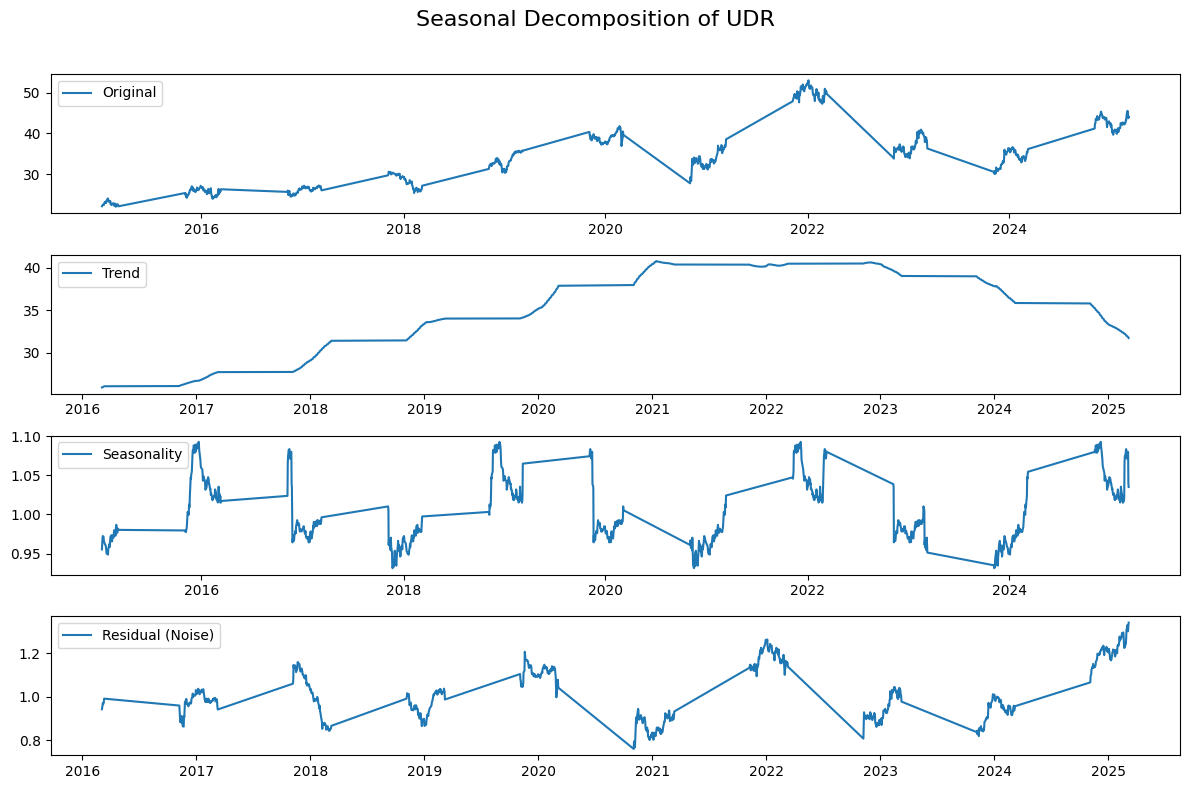

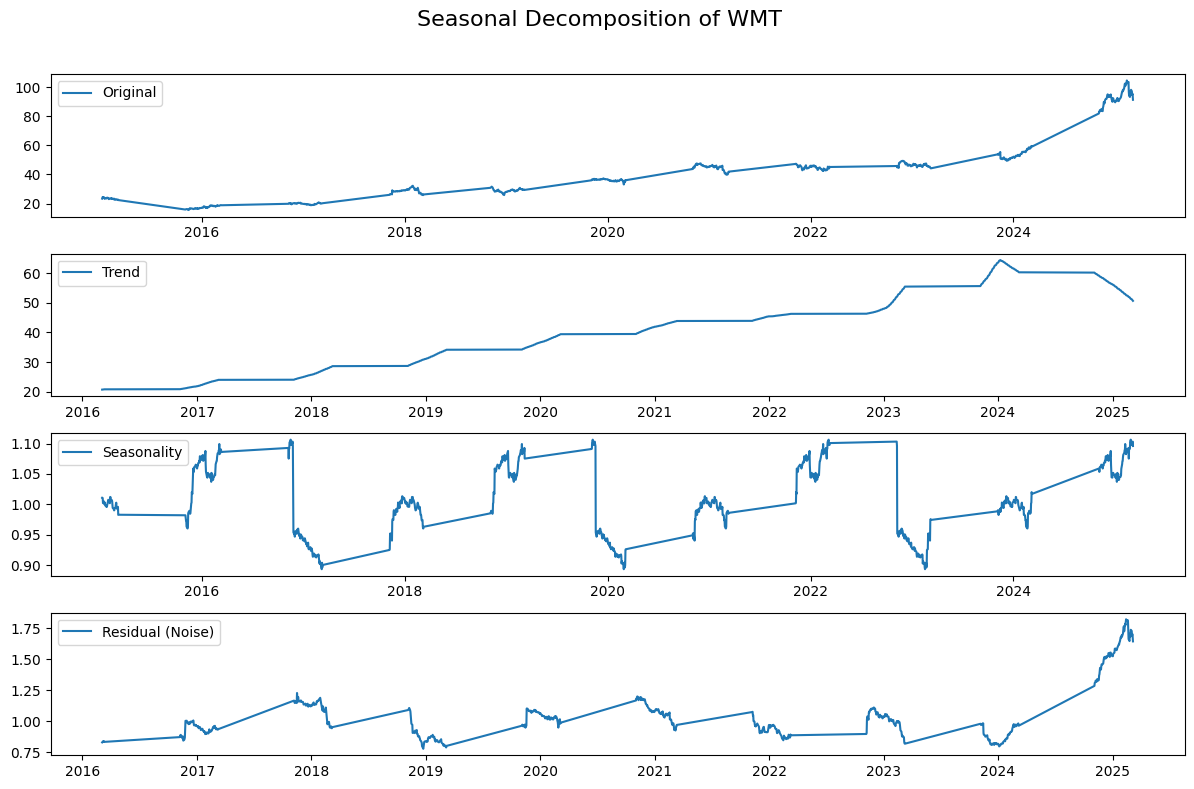

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Ensure Date is in datetime format
df['Date_x'] = pd.to_datetime(df['Date_x'])

# Loop through each stock
for ticker, group in df.groupby('Stock'):
    # Sort the group by date
    group = group.sort_values('Date_x')

    # Use the price column (replace 'Price' with your actual column name)
    series = group.set_index('Date_x')['Close'].dropna()

    if len(series) < 300:
        continue  # Skip if not enough data

    # Apply seasonal decomposition
    result = seasonal_decompose(series, model='multiplicative', period=252)

    # Plotting
    plt.figure(figsize=(12, 8))
    plt.suptitle(f"Seasonal Decomposition of {ticker}", fontsize=16)

    plt.subplot(411)
    plt.plot(series, label='Original')
    plt.legend(loc='upper left')

    plt.subplot(412)
    plt.plot(result.trend, label='Trend')
    plt.legend(loc='upper left')

    plt.subplot(413)
    plt.plot(result.seasonal, label='Seasonality')
    plt.legend(loc='upper left')

    plt.subplot(414)
    plt.plot(result.resid, label='Residual (Noise)')
    plt.legend(loc='upper left')

    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.show()

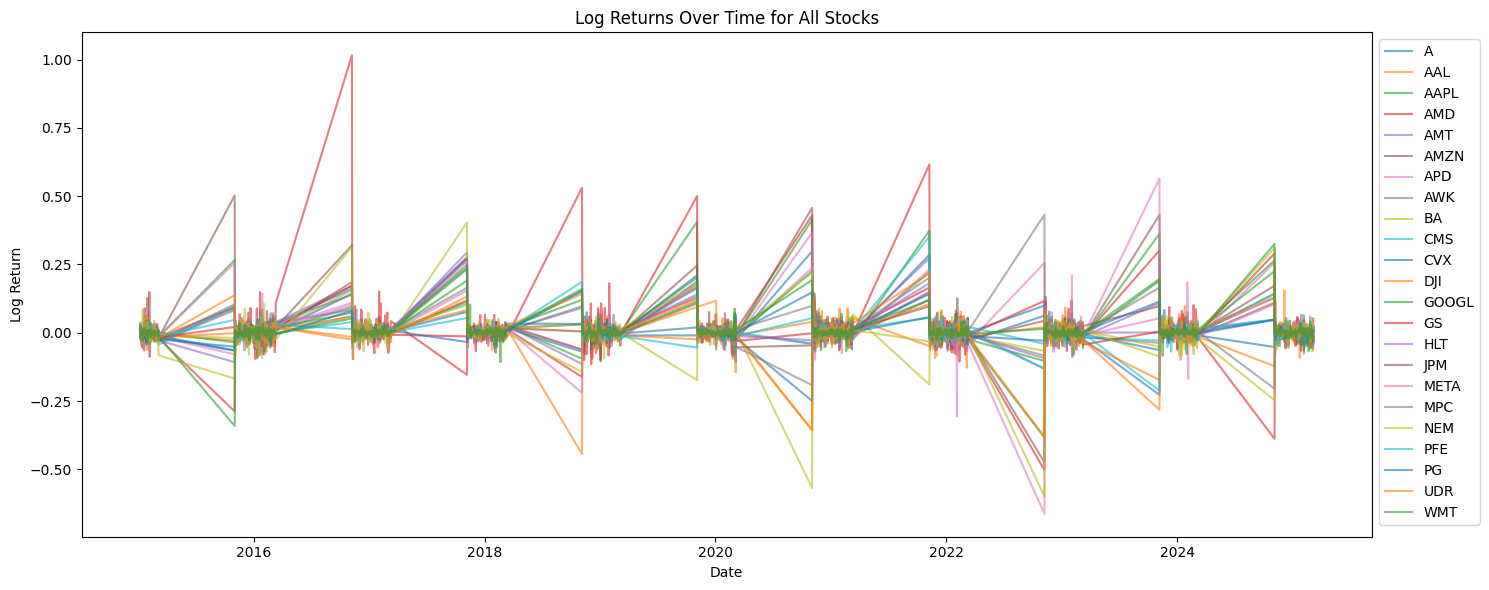

ValueError: Index contains duplicate entries, cannot reshape

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Ensure datetime format
df['Date_x'] = pd.to_datetime(df['Date_x'])

# Sort the values
df = df.sort_values(['Stock', 'Date_x'])

df['LogReturn'] = df.groupby('Stock')['Close'].transform(lambda x: np.log(x) - np.log(x.shift(1)))


# ---------- 1. Combined Time Series Plot ----------
plt.figure(figsize=(15, 6))
for stock, group in df.groupby('Stock'):
    plt.plot(group['Date_x'], group['LogReturn'], label=stock, alpha=0.6)
plt.title('Log Returns Over Time for All Stocks')
plt.xlabel('Date')
plt.ylabel('Log Return')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

# ---------- 2. Correlation Heatmap (via groupby, still needs pivot logic internally) ----------
# We'll temporarily pivot only for correlation matrix (internally)
returns_matrix = df.pivot(index='Date_x', columns='Stock', values='LogReturn').dropna()
correlation_matrix = returns_matrix.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Between Stock Log Returns')
plt.show()


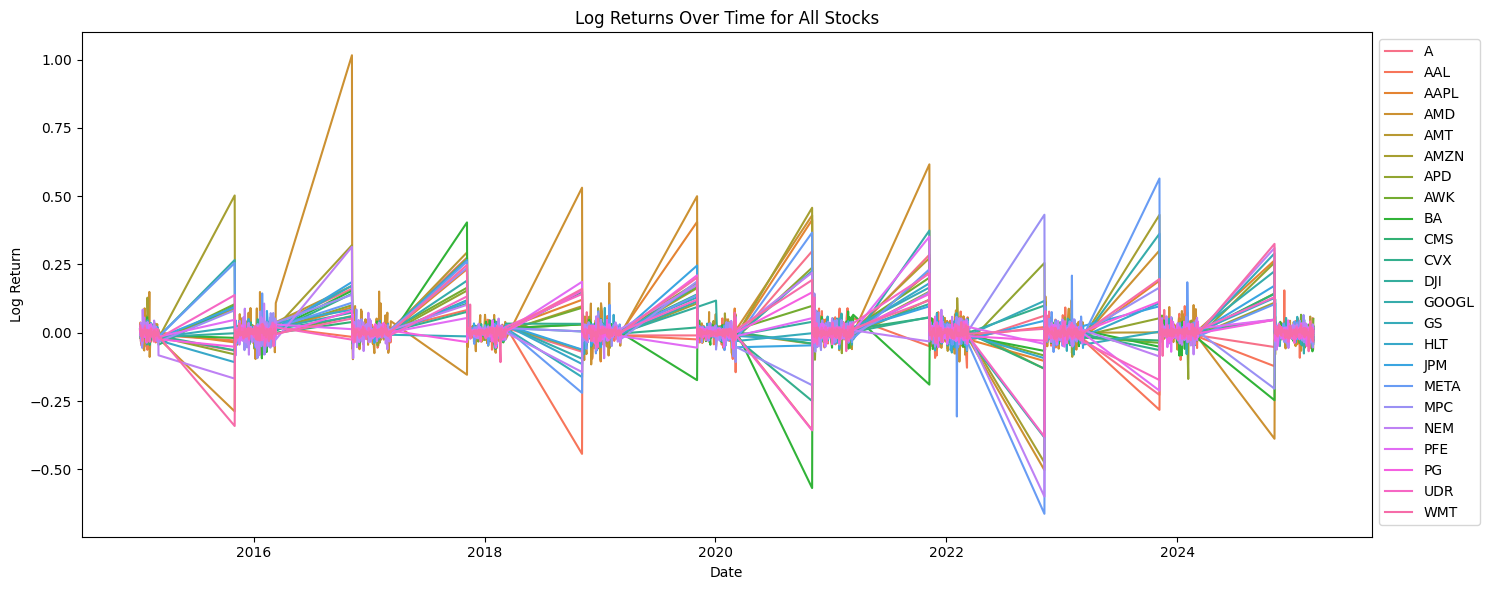

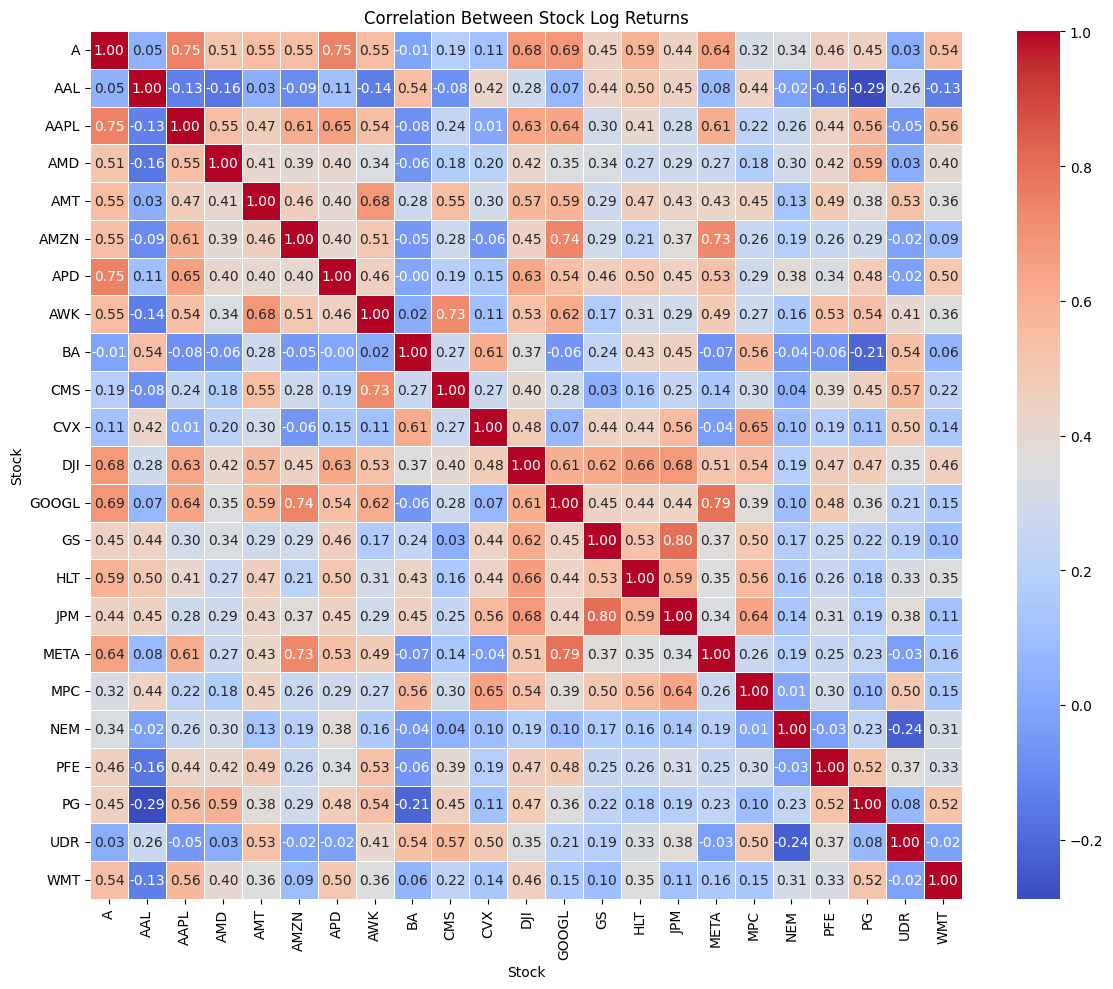

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Ensure date column is datetime and sorted
df['Date_x'] = pd.to_datetime(df['Date_x'])
df = df.sort_values(['Stock', 'Date_x'])

# Step 2: Compute log returns using transform (preserves long format)
df['LogReturn'] = df.groupby('Stock')['Close'].transform(lambda x: np.log(x) - np.log(x.shift(1)))

# Step 3: Filter out rows where log return is missing
df_filtered = df.dropna(subset=['LogReturn'])

# Step 4: Plot log returns using long format
plt.figure(figsize=(15, 6))
sns.lineplot(data=df_filtered, x='Date_x', y='LogReturn', hue='Stock', legend=True)
plt.title('Log Returns Over Time for All Stocks')
plt.xlabel('Date')
plt.ylabel('Log Return')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

# Step 5: Compute correlation matrix manually from grouped returns
# Step 5a: Convert groupby result into wide matrix for correlation (necessary)
returns_matrix = (
    df_filtered.groupby(['Date_x', 'Stock'])['LogReturn']
    .mean()
    .unstack()
    .dropna()
)

# Step 5b: Compute and plot correlation heatmap
correlation_matrix = returns_matrix.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Between Stock Log Returns')
plt.tight_layout()
plt.show()


In [ ]:
!pip uninstall -y numpy pmdarima
!pip install numpy --upgrade
!pip install pmdarima --no-cache-dir

Found existing installation: numpy 1.24.3
Uninstalling numpy-1.24.3:
  Successfully uninstalled numpy-1.24.3
  Using cached numpy-2.2.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Using cached numpy-2.2.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.4 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.5 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.5 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 109.4 MB/s eta 0:00:00


In [ ]:
!pip uninstall -y numpy pmdarima
!pip install numpy==1.24.3
!pip install pmdarima==2.0.3

Found existing installation: numpy 2.2.5
Uninstalling numpy-2.2.5:
  Successfully uninstalled numpy-2.2.5
Found existing installation: pmdarima 2.0.4
Uninstalling pmdarima-2.0.4:
  Successfully uninstalled pmdarima-2.0.4
  Using cached numpy-1.24.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.6 kB)
Using cached numpy-1.24.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
blosc2 3.3.2 requires numpy>=1.26, but you have numpy 1.24.3 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.24.3 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.24.3 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.24.3 which is incompatible.
pymc 5.22.0 requires numpy>=1.25.0, but you have num

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 60.8 MB/s eta 0:00:00
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
    return func(self, options, args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/commands/install.py", line 377, in run
    requirement_set = resolver.resolve(
                      ^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/resolution/resolvelib/resolver.py", line 179, in resolve
^C


In [ ]:
!pip uninstall -y numpy pmdarima
!pip install numpy==1.24.3
!pip install pmdarima==2.0.3

In [ ]:
!pip uninstall -y numpy
!pip install numpy==1.24.3


Found existing installation: numpy 2.2.5
Uninstalling numpy-2.2.5:
  Successfully uninstalled numpy-2.2.5
  Using cached numpy-1.24.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.6 kB)
Using cached numpy-1.24.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
blosc2 3.3.2 requires numpy>=1.26, but you have numpy 1.24.3 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.24.3 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.24.3 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.24.3 which is incompatible.
pymc 5.22.0 requires numpy>=1.25.0, but you have numpy 1.24.3 which is incompatible.
albumentations 2.0.6 requires numpy>=1.24.4, but you have numpy 1.24.3 which is in

Component	Meaning

AR (p)	From PACF: cutoff after lag p (PACF spikes drop to 0 after lag p)

MA (q)	From ACF: cutoff after lag q (ACF spikes drop to 0 after lag q)

d	Differencing order (0 if already stationary; 1 if became stationary after
differencing or log returns)

Seasonal	If there's periodic correlation (not visible here), use SARIMA


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Macro_with_stocks.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful


📈 Processing stock: A
✅ MAE (in-sample) for A: 1.36


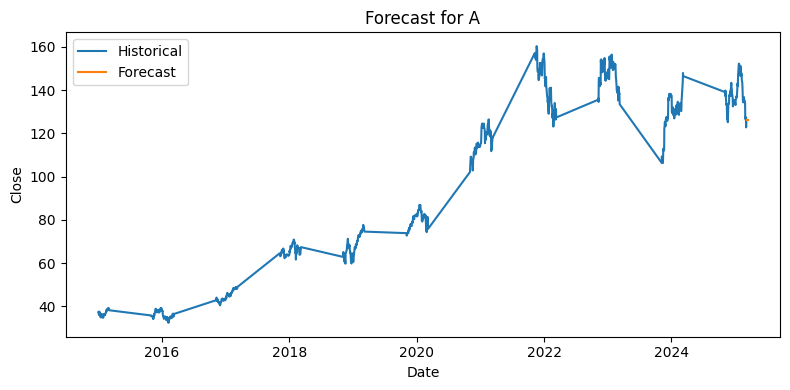


📈 Processing stock: AAL
✅ MAE (in-sample) for AAL: 0.62


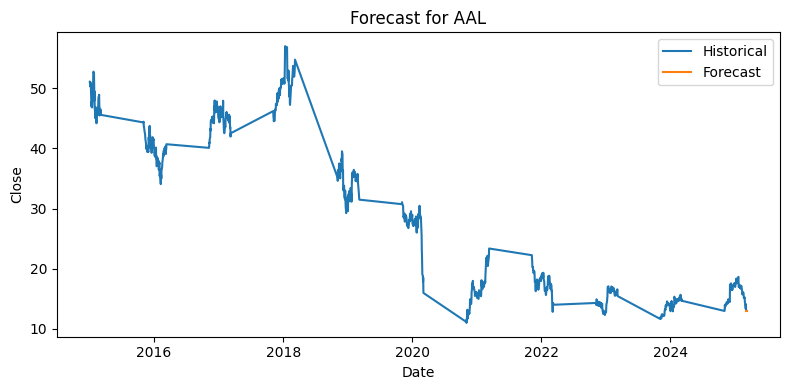


📈 Processing stock: AAPL
✅ MAE (in-sample) for AAPL: 1.52


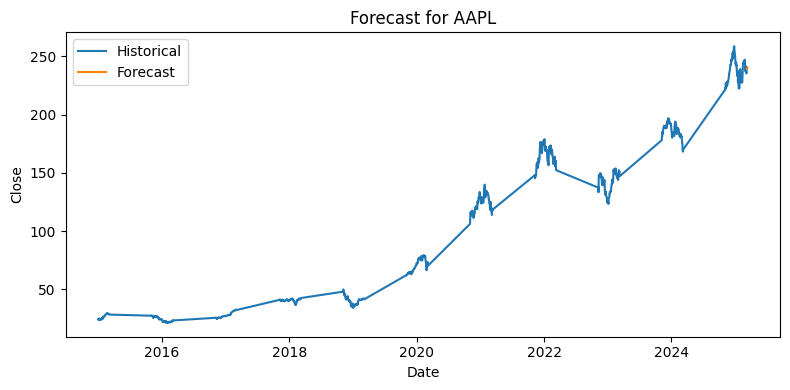


📈 Processing stock: AMD
✅ MAE (in-sample) for AMD: 1.80


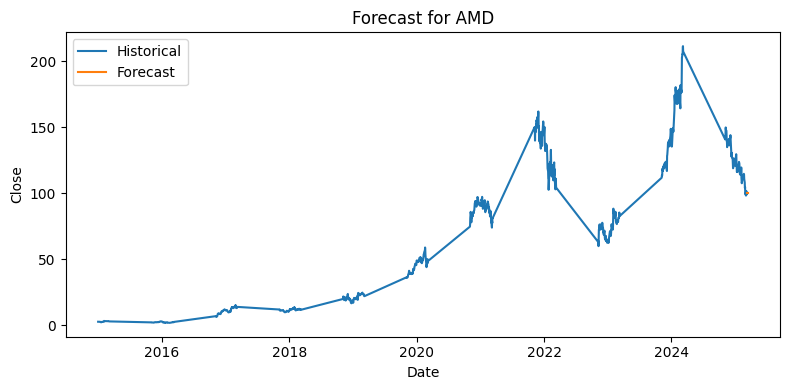


📈 Processing stock: AMT
✅ MAE (in-sample) for AMT: 2.12


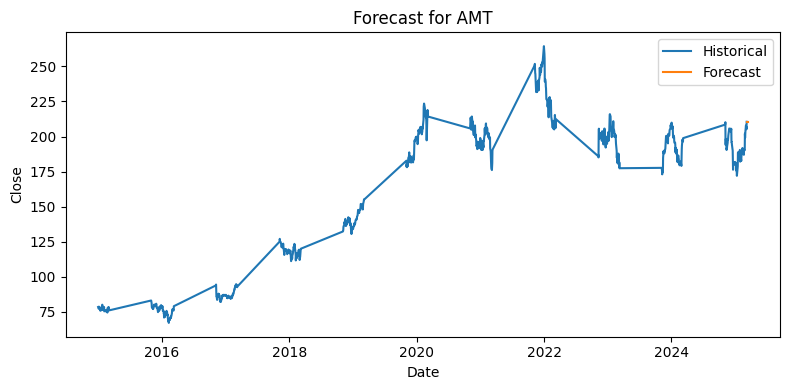


📈 Processing stock: AMZN
✅ MAE (in-sample) for AMZN: 1.83


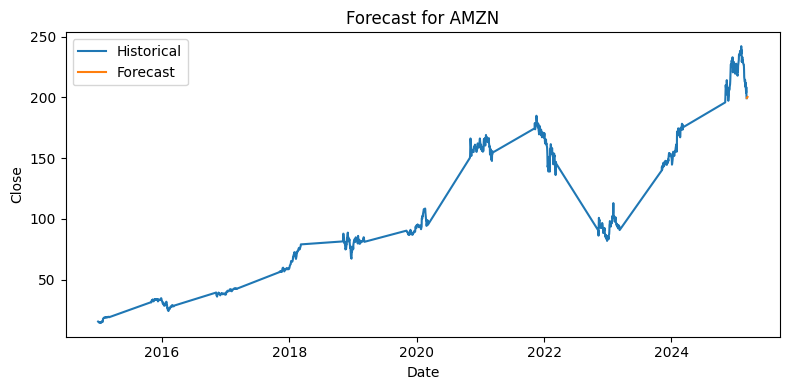


📈 Processing stock: APD
✅ MAE (in-sample) for APD: 2.66


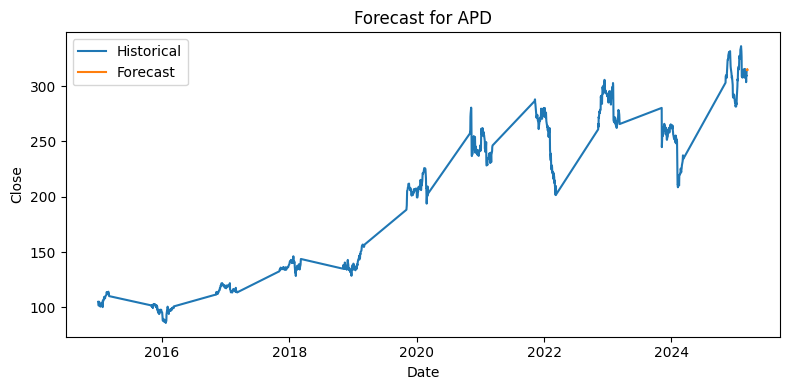


📈 Processing stock: AWK
✅ MAE (in-sample) for AWK: 1.26


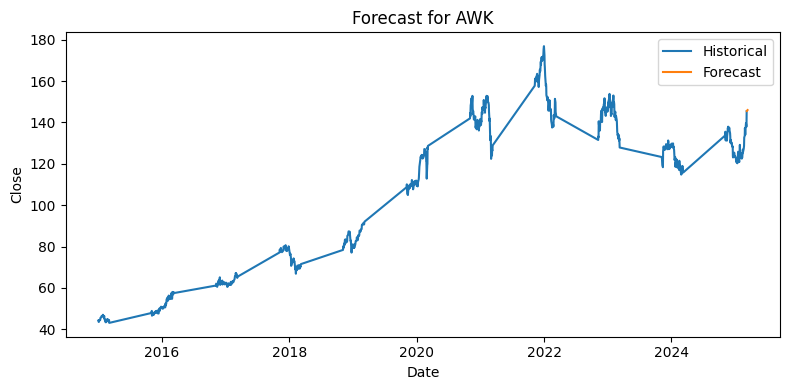


📈 Processing stock: BA
✅ MAE (in-sample) for BA: 3.98


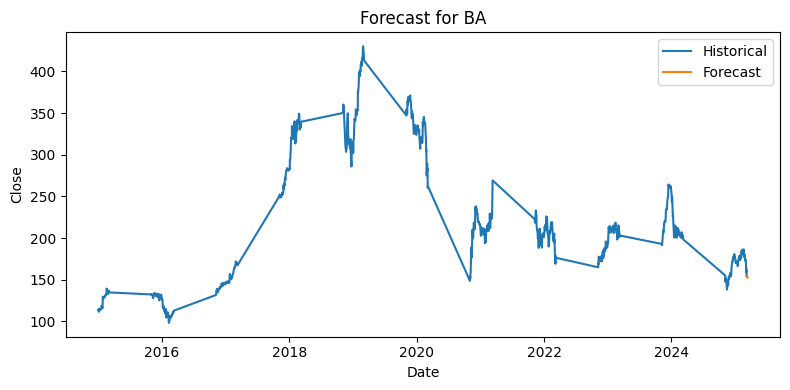


📈 Processing stock: CMS
✅ MAE (in-sample) for CMS: 0.49


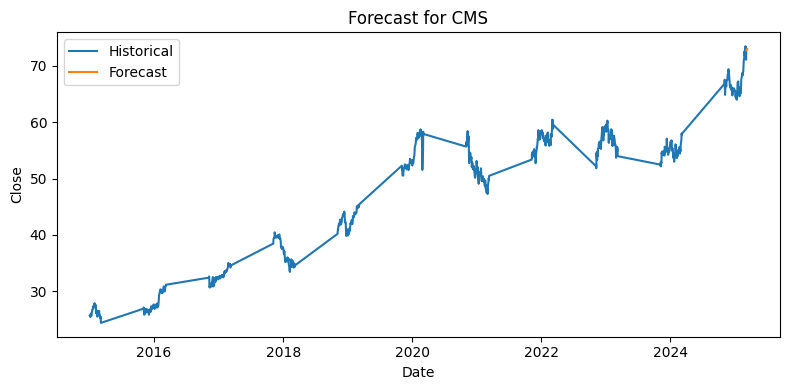


📈 Processing stock: CVX
✅ MAE (in-sample) for CVX: 1.34


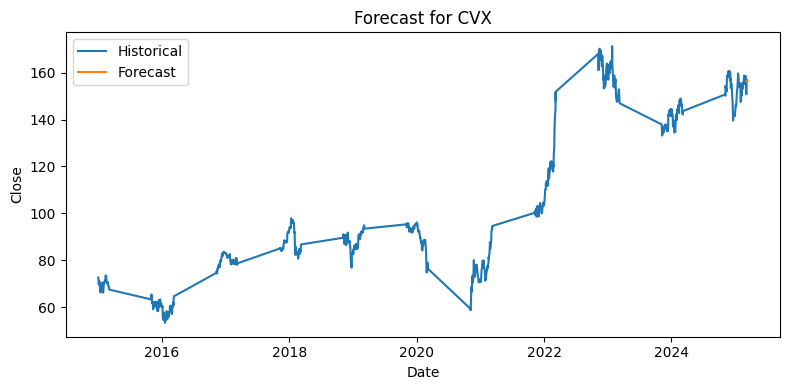


📈 Processing stock: DJI
✅ MAE (in-sample) for DJI: 237.40


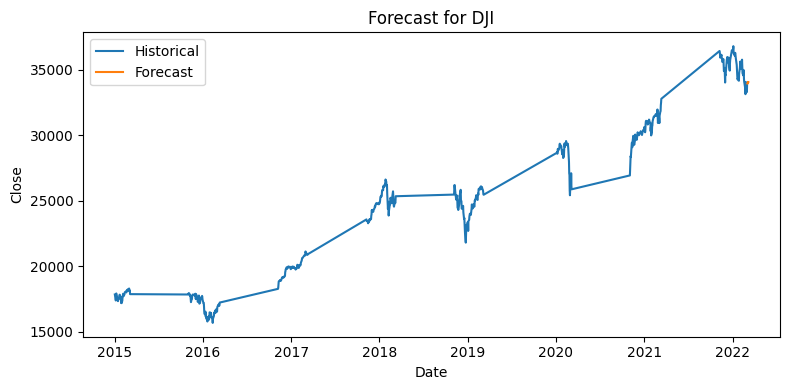


📈 Processing stock: GOOGL
✅ MAE (in-sample) for GOOGL: 1.42


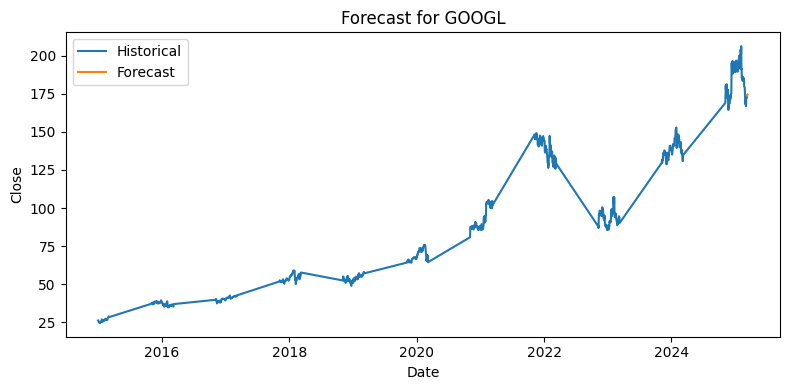


📈 Processing stock: GS
✅ MAE (in-sample) for GS: 4.01


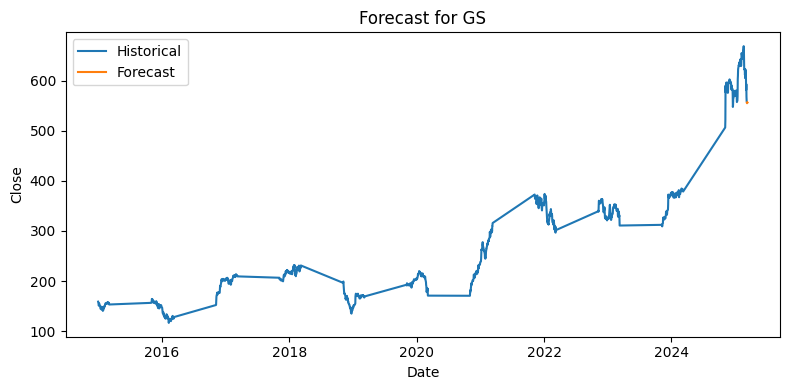


📈 Processing stock: HLT
✅ MAE (in-sample) for HLT: 1.55


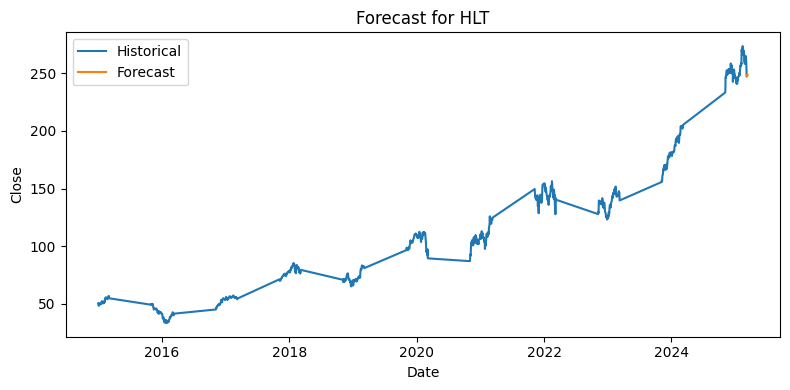


📈 Processing stock: JPM
✅ MAE (in-sample) for JPM: 1.43


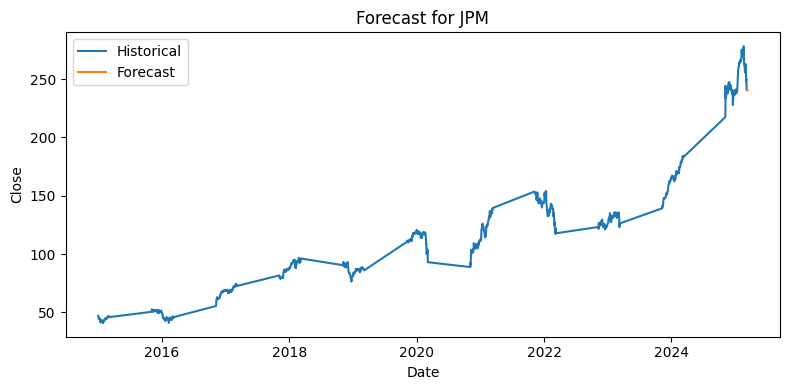


📈 Processing stock: META
✅ MAE (in-sample) for META: 4.42


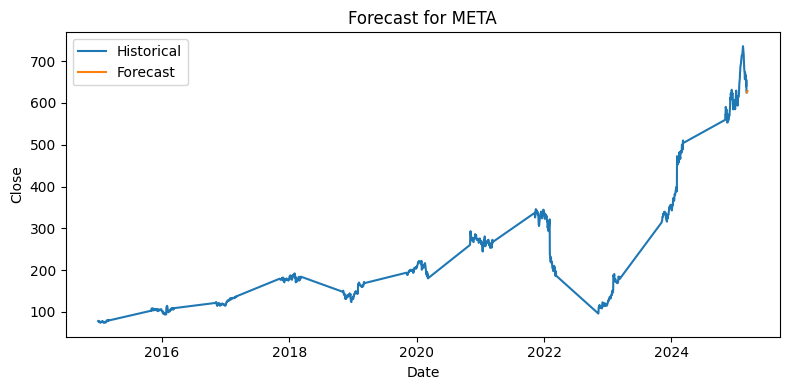


📈 Processing stock: MPC
✅ MAE (in-sample) for MPC: 1.31


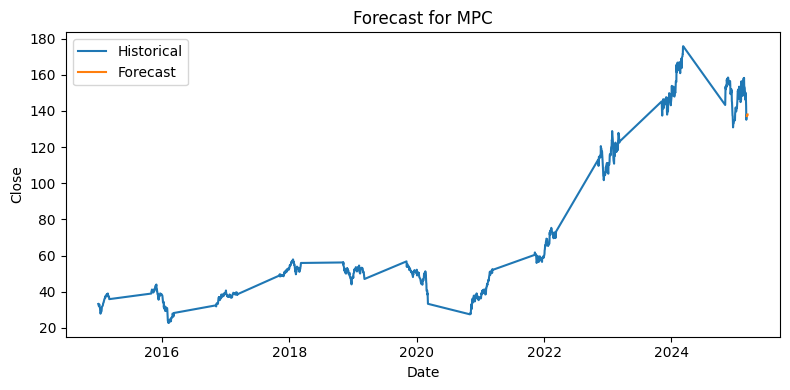


📈 Processing stock: NEM
✅ MAE (in-sample) for NEM: 0.68


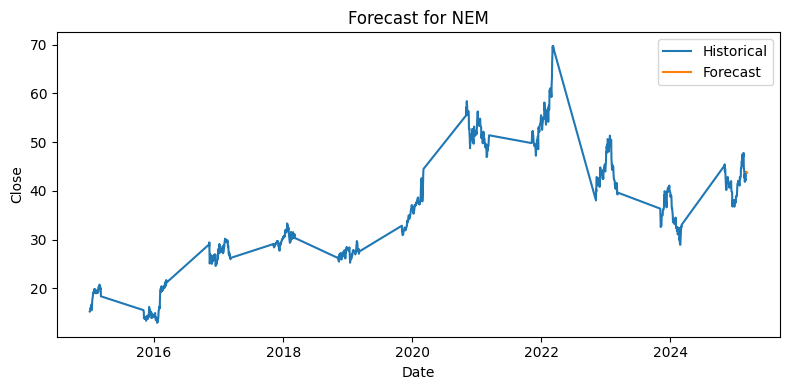


📈 Processing stock: PFE
✅ MAE (in-sample) for PFE: 0.38


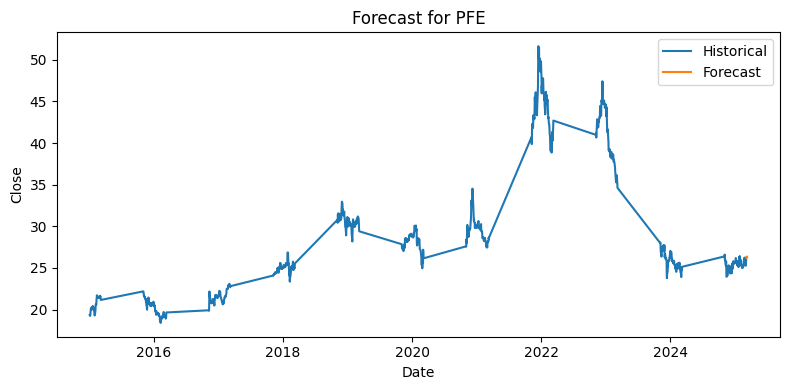


📈 Processing stock: PG
✅ MAE (in-sample) for PG: 1.03


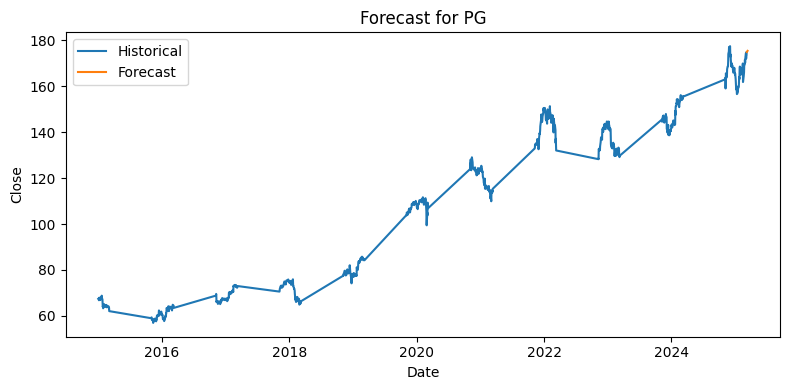


📈 Processing stock: UDR
✅ MAE (in-sample) for UDR: 0.47


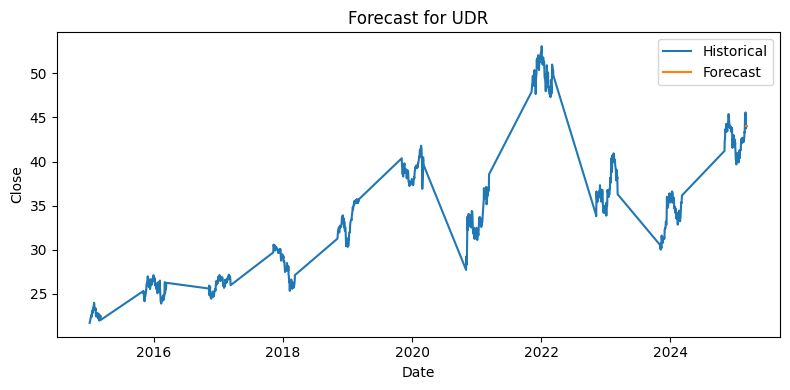


📈 Processing stock: WMT
✅ MAE (in-sample) for WMT: 0.49


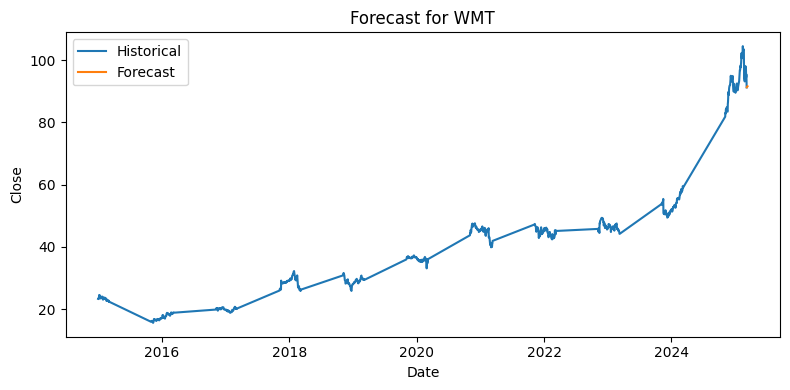

In [ ]:
import pandas as pd
from pmdarima import auto_arima
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

# Clean and prepare data
df = df.dropna(subset=['Date_x', 'Close'])  # Ensure no NaNs in essential columns
df['Date_x'] = pd.to_datetime(df['Date_x'], errors='coerce')
df = df.dropna(subset=['Date_x'])  # Remove rows where Date_x couldn't be converted
df = df.sort_values(['Stock', 'Date_x'])

# Containers
models = {}
forecast_results = {}
mae_results = {}
#add other
# Loop by stock group
for stock_code, group in df.groupby('Stock'):
    print(f"\n📈 Processing stock: {stock_code}")

    group = group.set_index('Date_x')
    y = group['Close']

    # Skip if insufficient data
    if len(y) < 15 or y.index[-1] is pd.NaT or pd.isnull(y.index[-1]):
        print(f"⚠️ Skipping {stock_code} due to insufficient or invalid data")
        continue

    # Fit Auto ARIMA
    try:
        model = auto_arima(y,
                           seasonal=True,
                           m=7,  # weekly seasonality
                           stepwise=True,
                           suppress_warnings=True,
                           error_action='ignore')
        models[stock_code] = model
    except Exception as e:
        print(f"❌ Error fitting model for {stock_code}: {e}")
        continue

    # In-sample prediction and MAE
    try:
        in_sample_pred = model.predict_in_sample()
        mae = mean_absolute_error(y, in_sample_pred)
        mae_results[stock_code] = mae
        print(f"✅ MAE (in-sample) for {stock_code}: {mae:.2f}")
    except Exception as e:
        print(f"⚠️ Could not compute MAE for {stock_code}: {e}")
        mae_results[stock_code] = None

    # Forecast
    n_periods = 5
    forecast = model.predict(n_periods=n_periods)
    forecast_results[stock_code] = forecast

    # Plot
    forecast_index = pd.date_range(start=y.index[-1] + pd.Timedelta(days=1), periods=n_periods, freq='D')
    plt.figure(figsize=(8, 4))
    plt.plot(y, label='Historical')
    plt.plot(forecast_index, forecast, label='Forecast')
    plt.title(f"Forecast for {stock_code}")
    plt.xlabel('Date')
    plt.ylabel('Close')
    plt.legend()
    plt.tight_layout()
    plt.show()



📈 Processing stock: A
✅ MAE (in-sample) for A: 1.36


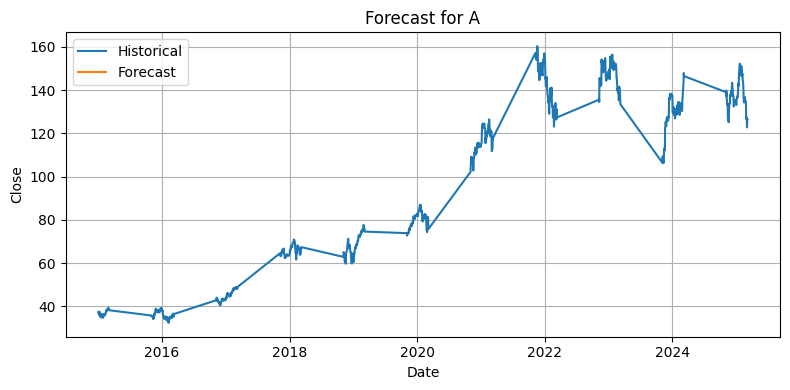


📈 Processing stock: AAL
✅ MAE (in-sample) for AAL: 0.62


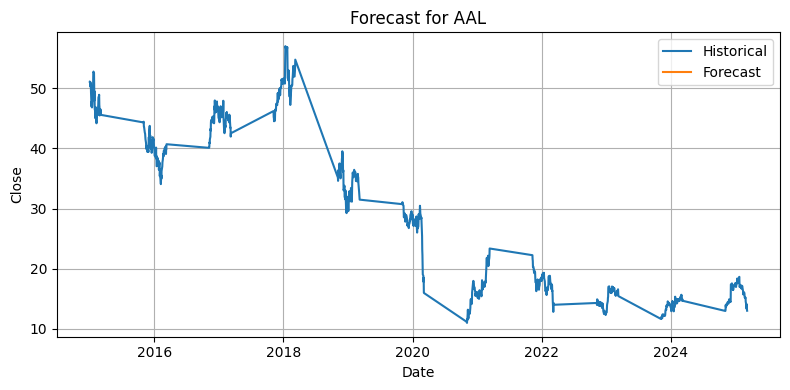


📈 Processing stock: AAPL


KeyboardInterrupt: 

In [ ]:
import pandas as pd
from pmdarima import auto_arima
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

# Clean and prepare data
df = df.dropna(subset=['Date_x', 'Close'])  # Ensure no NaNs in essential columns
df['Date_x'] = pd.to_datetime(df['Date_x'], errors='coerce')
df = df.dropna(subset=['Date_x'])  # Remove rows where Date_x couldn't be converted
df = df.sort_values(['Stock', 'Date_x'])

# Containers
models = {}
forecast_results = {}
mae_results = {}

# Loop by stock group
for stock_code, group in df.groupby('Stock'):
    print(f"\n📈 Processing stock: {stock_code}")

    group = group.set_index('Date_x')
    y = group['Close']

    # Skip if insufficient data
    if len(y) < 15 or y.index[-1] is pd.NaT or pd.isnull(y.index[-1]):
        print(f"⚠️ Skipping {stock_code} due to insufficient or invalid data")
        continue

    # Fit Auto ARIMA
    try:
        model = auto_arima(y,
                           seasonal=True,
                           m=7,  # weekly seasonality
                           stepwise=True,
                           suppress_warnings=True,
                           error_action='ignore')
        models[stock_code] = model
    except Exception as e:
        print(f"❌ Error fitting model for {stock_code}: {e}")
        continue

    # In-sample prediction and MAE
    try:
        in_sample_pred = model.predict_in_sample()
        mae = mean_absolute_error(y, in_sample_pred)
        mae_results[stock_code] = mae
        print(f"✅ MAE (in-sample) for {stock_code}: {mae:.2f}")
    except Exception as e:
        print(f"⚠️ Could not compute MAE for {stock_code}: {e}")
        mae_results[stock_code] = None

    # Forecast
    n_periods = 5
    forecast_index = pd.date_range(start=y.index[-1] + pd.Timedelta(days=1), periods=n_periods, freq='D')
    prediction = pd.DataFrame(model.predict(n_periods=n_periods), index=forecast_index)
    prediction.columns = ['Predicted']
    forecast_results[stock_code] = prediction

    # Plot
    plt.figure(figsize=(8, 4))
    plt.plot(y, label='Historical')
    plt.plot(forecast_index, prediction['Predicted'], label='Forecast')
    plt.title(f"Forecast for {stock_code}")
    plt.xlabel('Date')
    plt.ylabel('Close')
    plt.legend()
    plt.tight_layout()
    plt.grid(True)
    plt.show()


In [ ]:
import pandas as pd
from pmdarima import auto_arima
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

# Clean and prepare data
df = df.dropna(subset=['Date_x', 'Close'])  # Ensure no NaNs in essential columns
df['Date_x'] = pd.to_datetime(df['Date_x'], errors='coerce')
df = df.dropna(subset=['Date_x'])  # Remove rows where Date_x couldn't be converted
df = df.sort_values(['Stock', 'Date_x'])

# Containers
models = {}
forecast_results = {}
mae_results = {}

# Loop by stock group
for stock_code, group in df.groupby('Stock'):
    print(f"\n📈 Processing stock: {stock_code}")

    group = group.set_index('Date_x')
    y = group['Close']

    # Skip if insufficient data
    if len(y) < 15 or y.index[-1] is pd.NaT or pd.isnull(y.index[-1]):
        print(f"⚠️ Skipping {stock_code} due to insufficient or invalid data")
        continue

    # Fit Auto ARIMA
    try:
        model = auto_arima(
            y,
            seasonal=True,
            m=365,  # yearly seasonality likely fits better than weekly
            start_p=1, start_q=1,
            max_p=3, max_q=3,
            max_d=2,
            start_P=1, start_Q=1,
            max_P=2, max_Q=2,
            max_D=1,
            stepwise=True,
            suppress_warnings=False,
            error_action='warn',
            trace=True
        )
        models[stock_code] = model
    except Exception as e:
        print(f"❌ Error fitting model for {stock_code}: {e}")
        continue

    # In-sample prediction and MAE
    try:
        in_sample_pred = model.predict_in_sample()
        mae = mean_absolute_error(y, in_sample_pred)
        mae_results[stock_code] = mae
        print(f"✅ MAE (in-sample) for {stock_code}: {mae:.2f}")
    except Exception as e:
        print(f"⚠️ Could not compute MAE for {stock_code}: {e}")
        mae_results[stock_code] = None

    # Forecast
    n_periods = 5
    forecast_index = pd.date_range(start=y.index[-1] + pd.Timedelta(days=1), periods=n_periods, freq='D')
    prediction = pd.DataFrame(model.predict(n_periods=n_periods), index=forecast_index)
    prediction.columns = ['Predicted']
    forecast_results[stock_code] = prediction

    # Plot
    plt.figure(figsize=(8, 4))
    plt.plot(y, label='Historical')
    plt.plot(forecast_index, prediction['Predicted'], label='Forecast')
    plt.title(f"Forecast for {stock_code}")
    plt.xlabel('Date')
    plt.ylabel('Close')
    plt.legend()
    plt.tight_layout()
    plt.grid(True)
    plt.show()



📈 Processing stock: A
Performing stepwise search to minimize aic


KeyboardInterrupt: 

In [ ]:
print(prediction.head())

            Predicted
2025-03-08        NaN
2025-03-09        NaN
2025-03-10        NaN
2025-03-11        NaN
2025-03-12        NaN


In [ ]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  903
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -1301.087
Date:                Tue, 13 May 2025   AIC                           2604.173
Time:                        19:27:21   BIC                           2608.978
Sample:                             0   HQIC                          2606.009
                                - 903                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         1.0481      0.006    184.257      0.000       1.037       1.059
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):            829952.51
Prob(Q):                              0.76   Pr

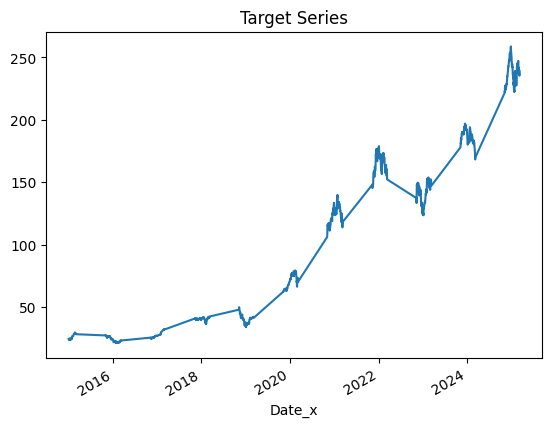

In [ ]:
y.plot(title="Target Series")
plt.show()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[7]             : AIC=10332.884, Time=0.33 sec
 ARIMA(1,1,0)(1,1,0)[7]             : AIC=9428.949, Time=3.31 sec
 ARIMA(0,1,1)(0,1,1)[7]             : AIC=inf, Time=6.70 sec
 ARIMA(1,1,0)(0,1,0)[7]             : AIC=10266.475, Time=0.16 sec
 ARIMA(1,1,0)(2,1,0)[7]             : AIC=8913.318, Time=1.60 sec
 ARIMA(1,1,0)(3,1,0)[7]             : AIC=8649.695, Time=3.23 sec
 ARIMA(1,1,0)(4,1,0)[7]             : AIC=8567.647, Time=5.46 sec
 ARIMA(1,1,0)(5,1,0)[7]             : AIC=8511.890, Time=5.25 sec
 ARIMA(1,1,0)(5,1,1)[7]             : AIC=inf, Time=70.20 sec
 ARIMA(1,1,0)(4,1,1)[7]             : AIC=inf, Time=53.44 sec
 ARIMA(0,1,0)(5,1,0)[7]             : AIC=8551.629, Time=4.46 sec
 ARIMA(2,1,0)(5,1,0)[7]             : AIC=8512.740, Time=8.45 sec
 ARIMA(1,1,1)(5,1,0)[7]             : AIC=8512.967, Time=21.72 sec
 ARIMA(0,1,1)(5,1,0)[7]             : AIC=8513.871, Time=6.12 sec
 ARIMA(2,1,1)(5,1,0)[7]             : AIC=8

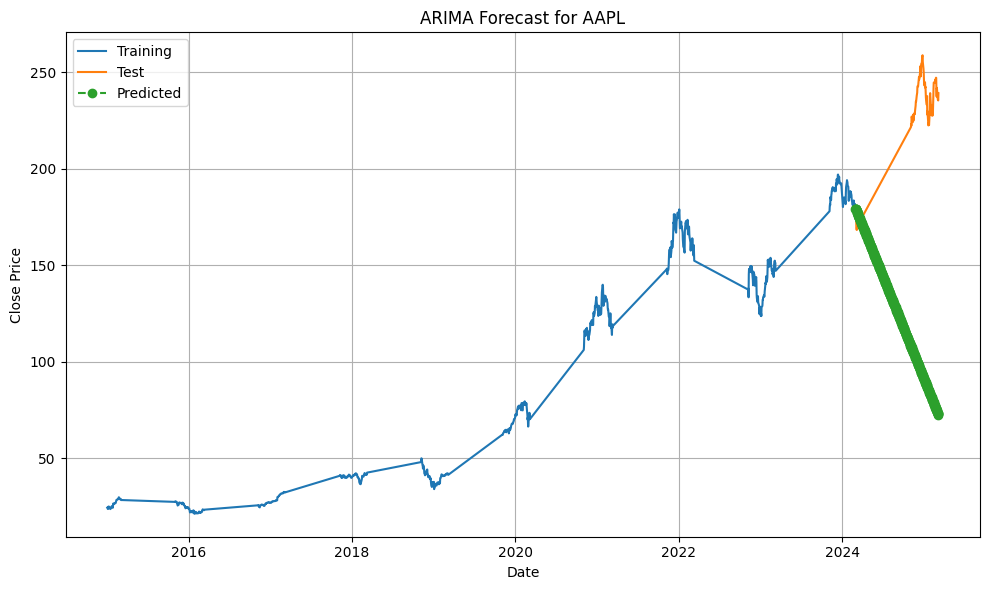

In [ ]:
from pmdarima import auto_arima
import matplotlib.pyplot as plt
import pandas as pd

# 1. Clean and prepare your data
df['Date_x'] = pd.to_datetime(df['Date_x'], errors='coerce', utc=True)
df['Date_x'] = df['Date_x'].dt.tz_convert(None)

# 2. Focus on one stock
stock_df = df[df['Stock'] == 'AAPL'].sort_values('Date_x')
stock_df = stock_df.dropna(subset=['Close'])
ts = stock_df.set_index('Date_x')['Close'].asfreq('D').interpolate()

# 3. Train/test split
train_size = int(len(ts) * 0.9)
train, test = ts[:train_size], ts[train_size:]

# 4. Fit ARIMA
arima_model = auto_arima(train, start_p=0, d=1, start_q=0,
                         max_p=5, max_d=5, max_q=5,
                         start_P=0, D=1, start_Q=0, max_P=5,
                         max_D=5, max_Q=5, m=7, seasonal=True,
                         error_action='warn', trace=True,
                         suppress_warnings=True, stepwise=True,
                         random_state=20, n_fits=50)

# 5. Forecast
n_periods = len(test)
prediction = pd.DataFrame(arima_model.predict(n_periods=n_periods), index=test.index)
prediction.columns = ['Predicted']

# 6. Plot
plt.figure(figsize=(10, 6))
plt.plot(train, label="Training")
plt.plot(test, label="Test")
plt.plot(prediction, label="Predicted", linestyle='--', marker='o')
plt.legend(loc='best')
plt.title("ARIMA Forecast for AAPL")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.grid(True)
plt.tight_layout()
plt.show()

Hyperparameters